In [332]:
## Import libraries
# Data Manipulation
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations

# Data Visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations
import seaborn as sns            # For statistical data visualization
from scipy.optimize import curve_fit

# Lab 3 Part A
Force vs displacement for each type of spring

In [333]:
# Import dataset for part A
partA1_2lbsperin = pd.read_excel('PartA-1_2lbin.xlsx', skiprows = 1)
partA2_5lbsperin = pd.read_excel('PartA-2_5lbin.xlsx', skiprows = 1)
partA3_8lbsperin = pd.read_excel('PartA-3_8lbin.xlsx', skiprows = 1)
partA8_4lbsperin = pd.read_excel('PartA-8_4lbin.xlsx', skiprows = 1)

partA1_2lbsperin.head()

Time (s)  Load Cell (kg)  LVIT (V)
0      0.05        0.468866 -0.065540
1      0.10        0.469031 -0.066526
2      0.15        0.469195 -0.066197
3      0.20        0.468866 -0.065211
4      0.25        0.469195 -0.066197

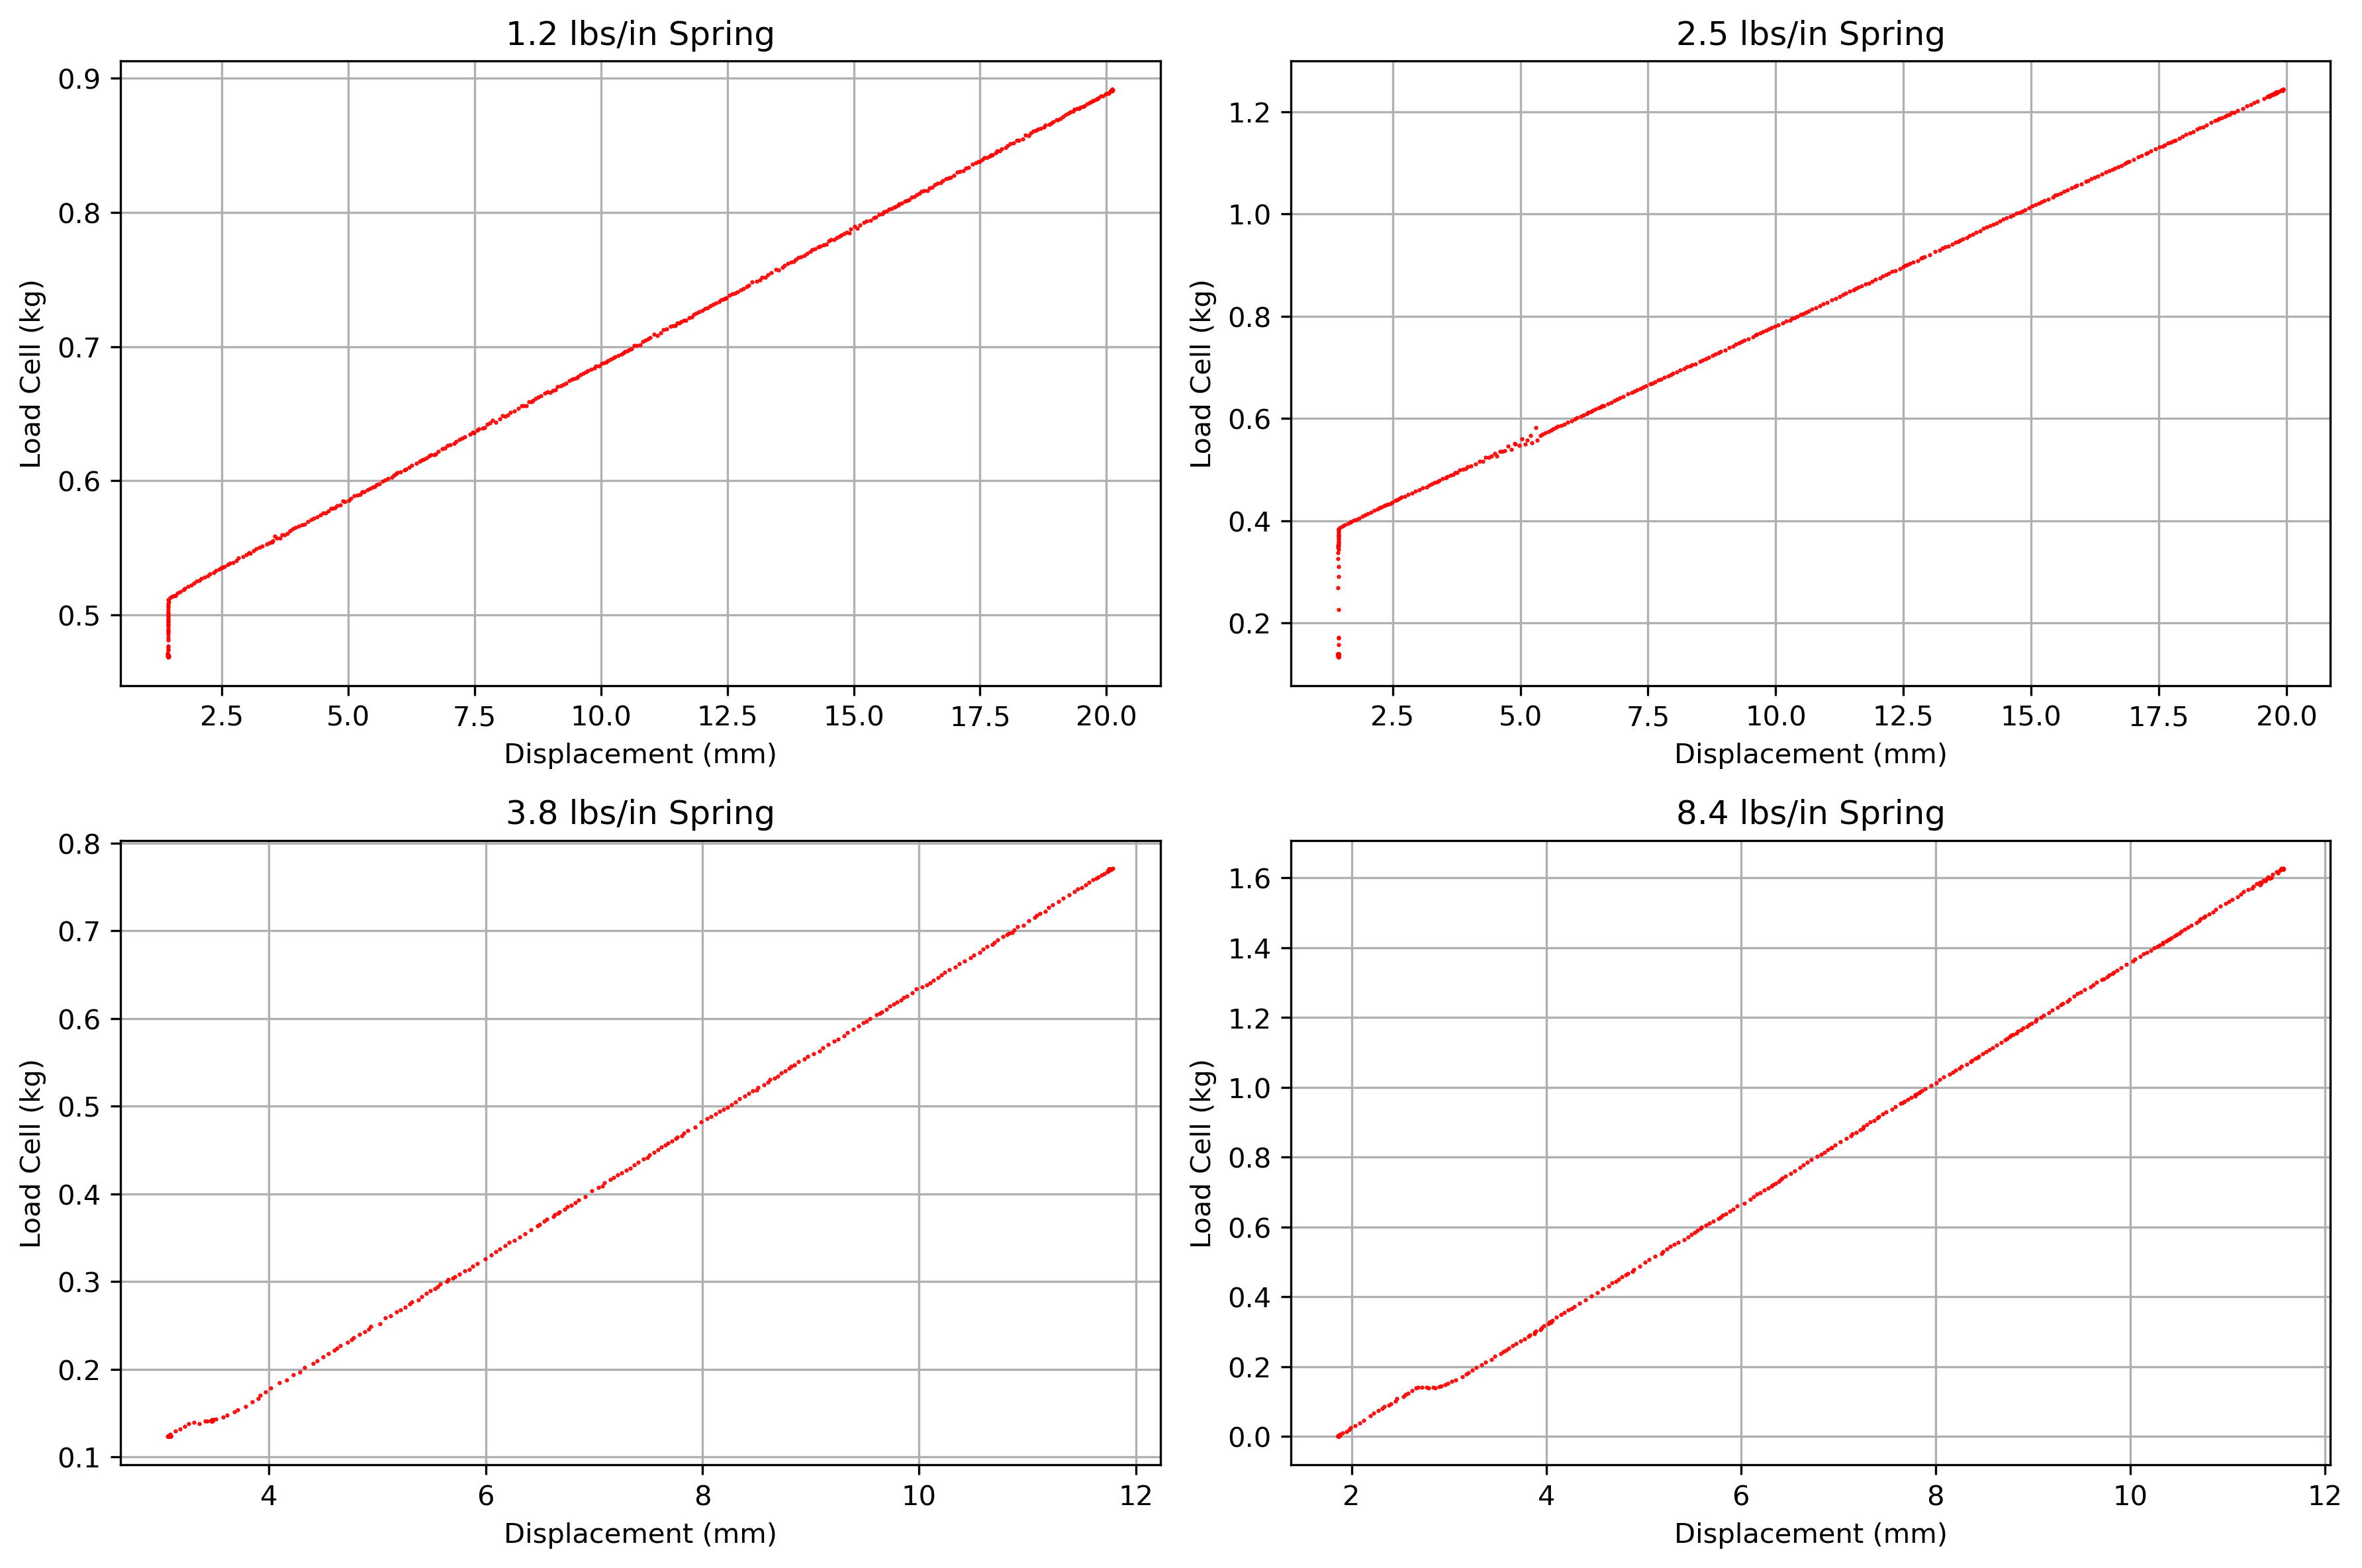

In [334]:
displacement1_2lbsperin = []
displacement2_5lbsperin = []
displacement3_8lbsperin = []
displacement8_4lbsperin = []

# Plotting large data efficiently
fig, axs = plt.subplots(2, 2, figsize=(12, 8), dpi=300)  # 2 rows, 2 columns

# V(x) = -0.35 + 0.19x
for i in range(0, len(partA1_2lbsperin['Load Cell (kg)'])):
    displacement1_2lbsperin.append((partA1_2lbsperin['LVIT (V)'][i] + 0.345)/0.194)

for i in range(0, len(partA2_5lbsperin['Load Cell (kg)'])):
    displacement2_5lbsperin.append((partA2_5lbsperin['LVIT (V)'][i] + 0.345)/0.194)

for i in range(0, len(partA3_8lbsperin['Load Cell (kg)'])):
    displacement3_8lbsperin.append((partA3_8lbsperin['LVIT (V)'][i] + 0.345)/0.194)

for i in range(0, len(partA8_4lbsperin['Load Cell (kg)'])):
    displacement8_4lbsperin.append((partA8_4lbsperin['LVIT (V)'][i] + 0.345)/0.194)

partA1_2lbsperin['Displacement (mm)'] = displacement1_2lbsperin
partA2_5lbsperin['Displacement (mm)'] = displacement2_5lbsperin
partA3_8lbsperin['Displacement (mm)'] = displacement3_8lbsperin
partA8_4lbsperin['Displacement (mm)'] = displacement8_4lbsperin

# Plot for 1.2lbs/in spring
axs[0, 0].plot(partA1_2lbsperin['Displacement (mm)'], partA1_2lbsperin['Load Cell (kg)'], 'o', color='r', markersize=0.5)
axs[0, 0].set_title('1.2 lbs/in Spring')
axs[0, 0].set_xlabel('Displacement (mm)')
axs[0, 0].set_ylabel('Load Cell (kg)')
axs[0, 0].grid(True)

# Plot for 2.4lbs/in spring
axs[0, 1].plot(partA2_5lbsperin['Displacement (mm)'], partA2_5lbsperin['Load Cell (kg)'], 'o', color='r', markersize=0.5)
axs[0, 1].set_title('2.5 lbs/in Spring')
axs[0, 1].set_xlabel('Displacement (mm)')
axs[0, 1].set_ylabel('Load Cell (kg)')
axs[0, 1].grid(True)

# Plot for 3.8lbs/in spring
axs[1, 0].plot(partA3_8lbsperin['Displacement (mm)'], partA3_8lbsperin['Load Cell (kg)'], 'o', color='r', markersize=0.5)
axs[1, 0].set_title('3.8 lbs/in Spring')
axs[1, 0].set_xlabel('Displacement (mm)')
axs[1, 0].set_ylabel('Load Cell (kg)')
axs[1, 0].grid(True)

# Plot for 8.4lbs/in spring
axs[1, 1].plot(partA8_4lbsperin['Displacement (mm)'], partA8_4lbsperin['Load Cell (kg)'], 'o', color='r', markersize=0.5)
axs[1, 1].set_title('8.4 lbs/in Spring')
axs[1, 1].set_xlabel('Displacement (mm)')
axs[1, 1].set_ylabel('Load Cell (kg)')
axs[1, 1].grid(True)

plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()

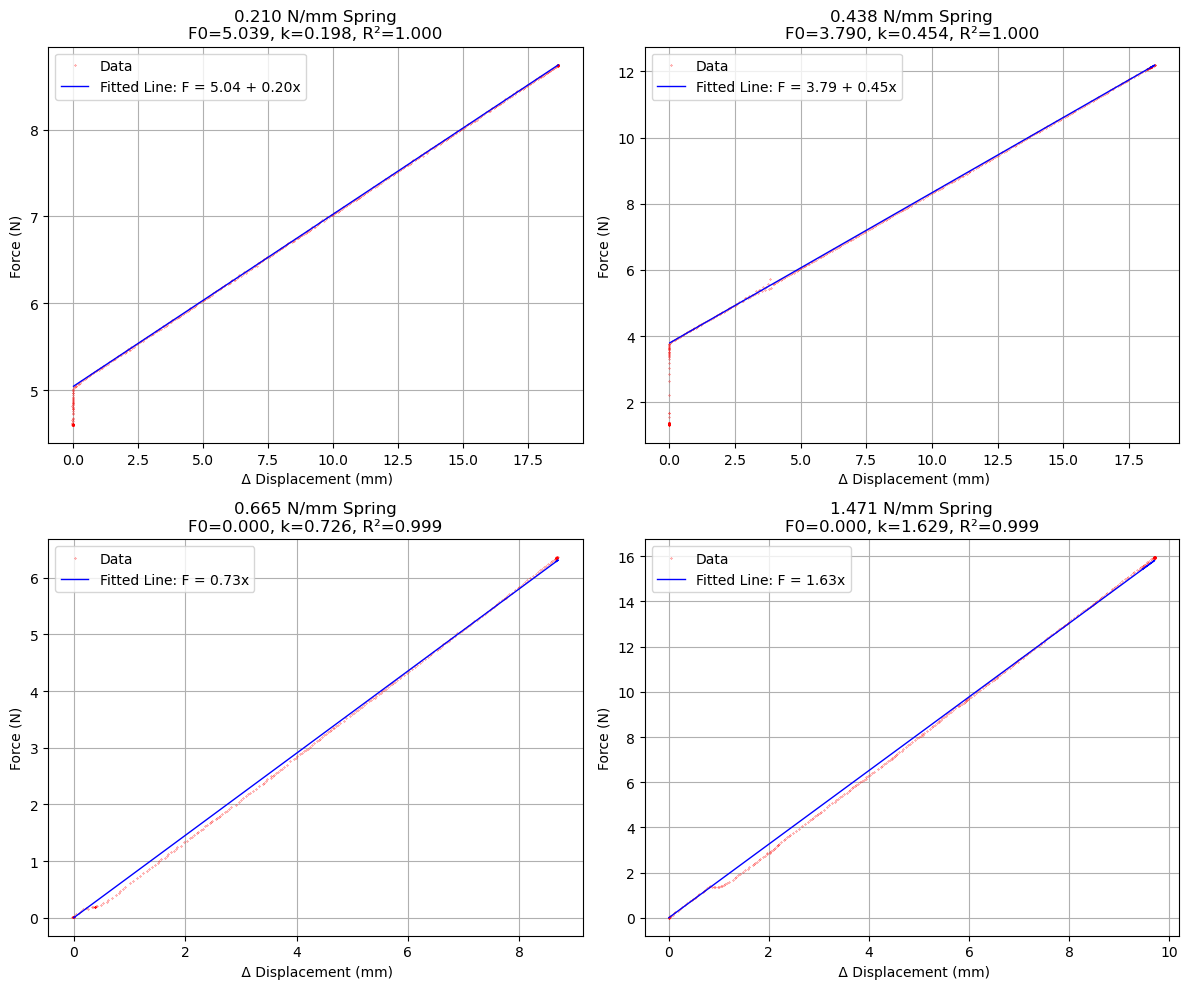

In [335]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# define the model functions
def model_function_with_offset(x, F0, k):
    return F0 + k*x

def model_function_through_origin(x, k):
    return k*x

# Define a function to calculate R^2
def r_squared(y, y_fit):
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define spring data and titles with elbow points for pre-tensioned springs
springs_data = [
    (partA1_2lbsperin, '0.210 N/mm Spring', (0, 0), 1.45, True),    # start at x=1.45mm
    (partA2_5lbsperin, '0.438 N/mm Spring', (0, 1), 1.45, True),    # start at x=1.45mm
    (partA3_8lbsperin, '0.665 N/mm Spring', (1, 0), 3.09, False),    # start at origin
    (partA8_4lbsperin, '1.471 N/mm Spring', (1, 1), 1.86, False)     # start at origin
]

# Process each spring
for data, title, (i, j), x_start, use_offset in springs_data:

    if title == '0.665 N/mm Spring':
        force_N = data['Load Cell (kg)'] * 9.81 - 1.20 ## Gotta explain this offset...
    else:
        force_N = data['Load Cell (kg)'] * 9.81
    
    # Filter data based on starting point
    mask = data['Displacement (mm)'] >= x_start
    x_data = data['Displacement (mm)'][mask] - x_start
    y_data = force_N[mask]
    
    if use_offset:
        # Fit with offset for pre-tensioned springs
        popt, pcov = curve_fit(model_function_with_offset, 
                              x_data, 
                              y_data,
                              p0=[1, -1])
        F0, k = popt
        y_fit = model_function_with_offset(x_data, F0, k)
        equation = f'F = {F0:.2f} + {k:.2f}x'
    else:
        # Fit through origin for non-pretensioned springs
        popt, pcov = curve_fit(model_function_through_origin, 
                              x_data, 
                              y_data,
                              p0=[-1])
        k = popt[0]
        F0 = 0
        y_fit = model_function_through_origin(x_data, k)
        equation = f'F = {k:.2f}x'
    
    # Calculate R^2
    r2 = r_squared(y_data, y_fit)
    
    # Plot all data points
    axs[i, j].plot(data['Displacement (mm)'] - x_start, force_N, '.', 
                   color='r', markersize=0.5, label='Data')
    
    # Plot fit only for the filtered portion
    axs[i, j].plot(x_data, y_fit, '-', 
                   color='b', linewidth=1, label=f'Fitted Line: {equation}')
    
    # Add title and labels with fit parameters
    axs[i, j].set_title(f'{title}\nF0={F0:.3f}, k={k:.3f}, R²={r2:.3f}')
    axs[i, j].set_xlabel(' \u0394 Displacement (mm)')
    axs[i, j].set_ylabel('Force (N)')
    axs[i, j].grid(True)
    axs[i, j].legend()

plt.tight_layout()
plt.show()

0.210 N/mm Spring (spring length offset: 1.44 mm): F (N) = 5.039 (N) + 0.198 (N/mm) * x (mm)

0.420 N/mm Spring (spring length offset: 1.43 mm): F (N) = 3.790 (N) + 0.454 (N/mm) * x (mm)

0.665 N/mm Spring (spring length offset: 3.09 mm): F (N) = 0.726 (N/mm) * x (mm)

1.471 N/mm Spring (spring length offset: 1.86 mm): F (N) = 1.629 (N/mm) * x (mm)

# Lab 3 Part B

In [336]:
partB0A = pd.read_excel("PartB-NoInput.xlsx", skiprows = 1)
partB0_5A = pd.read_excel("PartB-500mA.xlsx", skiprows = 1)
partB0_3A = pd.read_excel("PartB-300mA.xlsx", skiprows = 1)
partB0_71A = pd.read_excel("PartB-710mA.xlsx", skiprows = 1)

# partB0A2 = pd.read_excel("Mech 420 Lab 3 Part B 0A.xlsx", skiprows = 1)
# partB0_5A = pd.read_excel("Mech 420 Lab 3 Part B 0.15A.xlsx", skiprows = 1)
# partB0_3A = pd.read_excel("Mech 420 Lab 3 Part B 0.3A.xlsx", skiprows = 1)
# partB0_45A = pd.read_excel("Mech 420 Lab 3 Part B 0.45A.xlsx", skiprows = 1)

Mean_offset = partB0A['Load Cell (kg)'].mean()
print(Mean_offset)

0.14183619603691636


In [337]:
partB0A.head()

Time (s)  Load Cell (kg)  LVIT (V)  Coil Voltage (V)  Coil Current (A)
0    0.0001        0.141418  1.712732          0.309252          0.210770
1    0.0002        0.141582  1.713389          0.310238          0.207483
2    0.0003        0.142075  1.713718          0.306293          0.211427
3    0.0004        0.141089  1.713389          0.310238          0.208797
4    0.0005        0.141911  1.713718          0.308266          0.208797

Convert LVIT (V) to displacement (mm) column

In [338]:
partB0Adisplacement = []
partB0_5Adisplacement = []
partB0_3Adisplacement = []
partB0_71Adisplacement = []

# V(x) = -0.00646 + 0.1873x
for i in range(0, len(partB0A['Load Cell (kg)'])):
    partB0Adisplacement.append((partB0A['LVIT (V)'][i] + 0.00646)/0.1873)

for i in range(0, len(partB0_3A['Load Cell (kg)'])):
    partB0_3Adisplacement.append((partB0_3A['LVIT (V)'][i] + 0.00646)/0.1873)

for i in range(0, len(partB0_5A['Load Cell (kg)'])):
    partB0_5Adisplacement.append((partB0_5A['LVIT (V)'][i] + 0.00646)/0.1873)

for i in range(0, len(partB0_71A['Load Cell (kg)'])):
    partB0_71Adisplacement.append((partB0_71A['LVIT (V)'][i] + 0.00646)/0.1873)

partB0A['Displacement (mm)'] = partB0Adisplacement
partB0_5A['Displacement (mm)'] = partB0_5Adisplacement
partB0_3A['Displacement (mm)'] = partB0_3Adisplacement
partB0_71A['Displacement (mm)'] = partB0_71Adisplacement

# partB0_3A['Coil Current (A)'] = partB0_3A['Coil Current (A)'] - partB0A['Coil Current (A)']
# partB0_5A['Coil Current (A)'] = partB0_5A['Coil Current (A)'] - partB0A['Coil Current (A)']
# partB0_71A['Coil Current (A)'] = partB0_71A['Coil Current (A)'] - partB0A['Coil Current (A)']


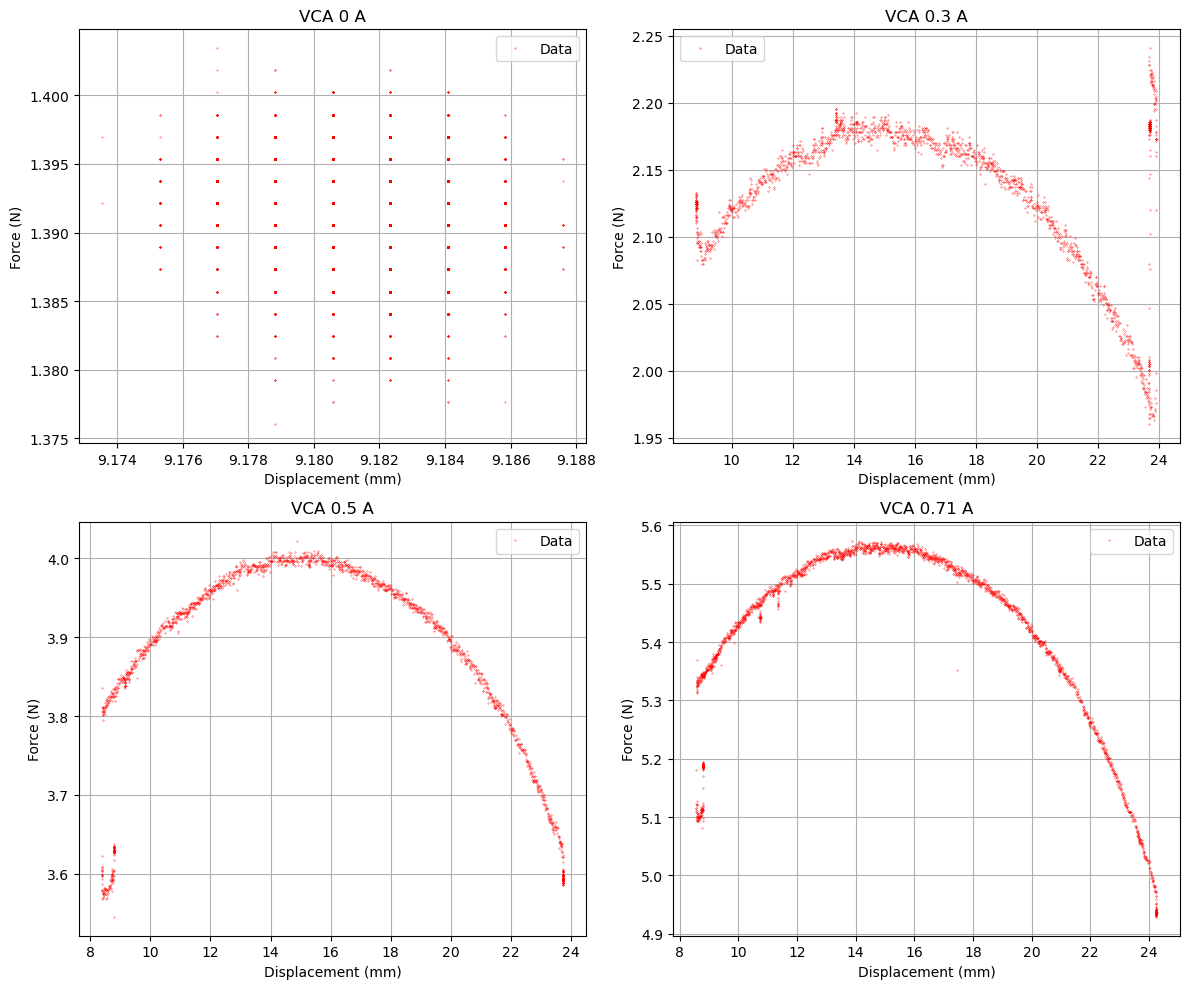

In [339]:
def cut_data_between_thresholds(df, column, lower_threshold, upper_threshold):
    """
    Cuts data from the DataFrame based on thresholds in a specified column.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - column (str): The column name on which to apply the thresholds.
    - lower_threshold (float): The lower threshold value.
    - upper_threshold (float): The upper threshold value.

    Returns:
    - pd.DataFrame: A DataFrame with data between the given thresholds.
    """
    # Apply the thresholds to filter the data
    cut_df = df[(df[column] >= lower_threshold) & (df[column] <= upper_threshold)]
    return cut_df

partB0Acut = cut_data_between_thresholds(partB0A, 'Time (s)', 0 , 50)
partB0_3Acut = cut_data_between_thresholds(partB0_3A, 'Time (s)', 0, 50)
partB0_5Acut = cut_data_between_thresholds(partB0_5A, 'Time (s)', 0, 50)
partB0_71Acut = cut_data_between_thresholds(partB0_71A, 'Time (s)', 0 , 50)

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define spring data and titles with elbow points for pre-tensioned springs
VCA_data = [
    (partB0A, 'VCA 0 A', (0, 0), 0),    # start at x=1.45mm
    (partB0_3A, 'VCA 0.3 A', (0, 1), 0),    # start at x=1.45mm
    (partB0_5A, 'VCA 0.5 A', (1, 0), 0),    # start at origin
    (partB0_71A, 'VCA 0.71 A', (1, 1), 0)     # start at origin
]

for data, title, _, _ in VCA_data:
    if title != 'VCA 0 A':
        data['Load Cell (kg)'] -= Mean_offset

# Process each spring
for data, title, (i, j), x_start in VCA_data:

    force_N = data['Load Cell (kg)'] * 9.81
    
    # Filter data based on starting point
    mask = data['Displacement (mm)'] >= x_start
    x_data = data['Displacement (mm)'][mask] - x_start
    y_data = force_N[mask]
    
    # Plot all data points
    axs[i, j].plot(data['Displacement (mm)'] - x_start, force_N, '.', 
                   color='r', markersize=0.5, label='Data')
    
    # Plot fit only for the filtered portion
    # axs[i, j].plot(x_data, y_fit, '-', 
    #                color='b', linewidth=1, label=f'Fitted Line: {equation}')
    
    # Add title and labels with fit parameters
    axs[i, j].set_title(f'{title}')
    axs[i, j].set_xlabel('Displacement (mm)')
    axs[i, j].set_ylabel('Force (N)')
    axs[i, j].grid(True)
    axs[i, j].legend()

plt.tight_layout()
plt.show()

0.2097089443155956


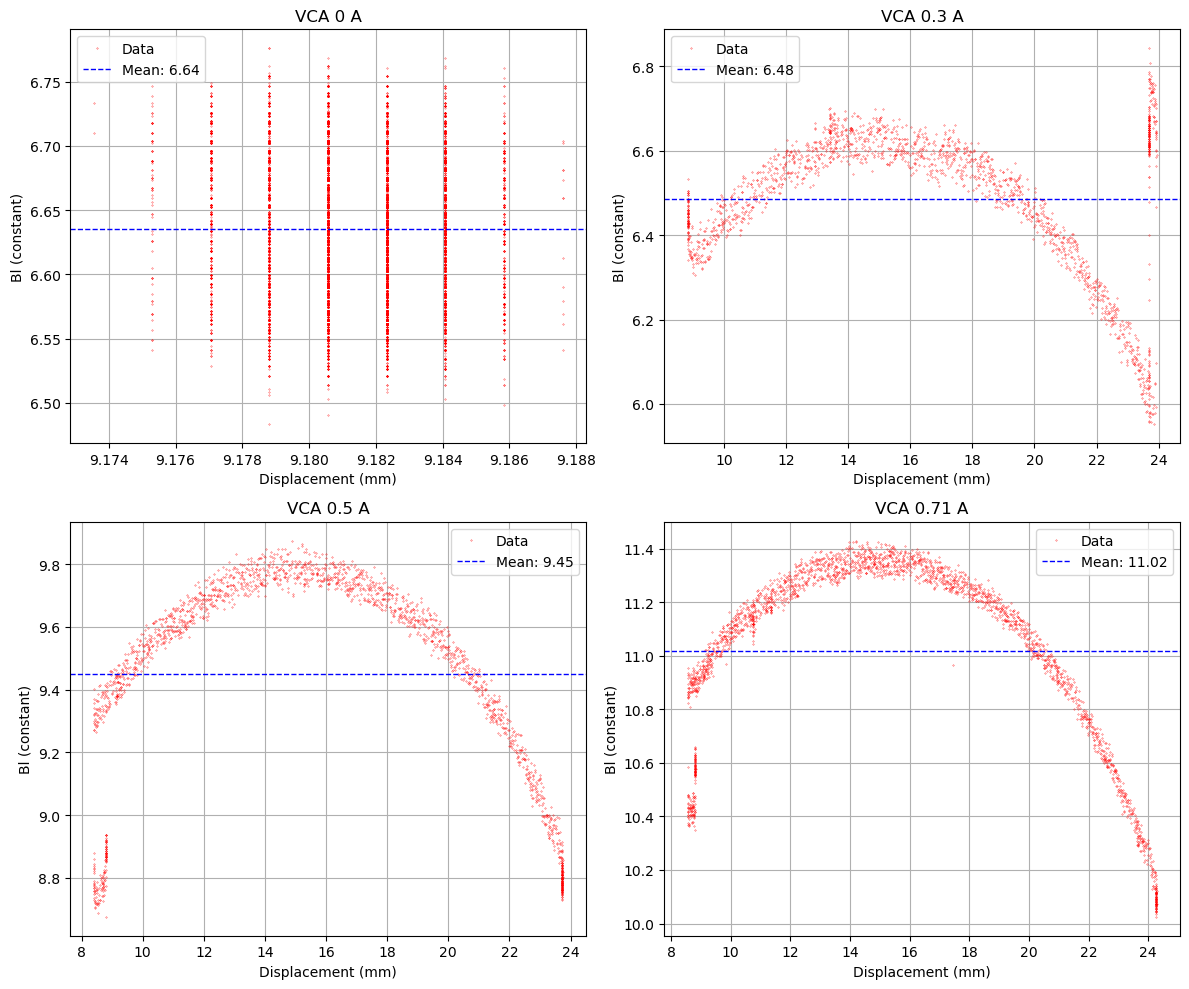

In [340]:
import matplotlib.pyplot as plt

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

current_offset = partB0A['Coil Current (A)'].mean()
print(current_offset)
# Define spring data and titles with elbow points for pre-tensioned springs
VCA_data = [
    (partB0A, 'VCA 0 A', (0, 0), 0),         # start at x=1.45mm
    (partB0_3A, 'VCA 0.3 A', (0, 1), 0.3),   # start at x=1.45mm
    (partB0_5A, 'VCA 0.5 A', (1, 0), 0.5),   # start at origin
    (partB0_71A, 'VCA 0.71 A', (1, 1), 0.71) # start at origin
]

# Process each spring
for data, title, (i, j), current in VCA_data:

    # Calculate Bl_constant with safe division
    Bl_constant = (data['Load Cell (kg)'] * 9.81) / data['Coil Current (A)']
    
    # Plot all data points
    axs[i, j].plot(data['Displacement (mm)'], Bl_constant, '.', 
                   color='r', markersize=0.5, label='Data')
    
    # Calculate and plot the mean as a horizontal line
    mean_value = Bl_constant.mean()
    axs[i, j].axhline(mean_value, color='blue', linestyle='--', linewidth=1,
                      label=f'Mean: {mean_value:.2f}')
    
    # Add Bl constant as a new column in data
    data['Bl (constant)'] = Bl_constant

    # Add title and labels
    axs[i, j].set_title(f'{title}')
    axs[i, j].set_xlabel('Displacement (mm)')
    axs[i, j].set_ylabel('Bl (constant)')
    axs[i, j].grid(True)
    axs[i, j].legend()

plt.tight_layout()
plt.show()


In [341]:
Bl_means = []
sum = 0

for data, title, _, _ in VCA_data:
    # Access the DataFrame from the tuple
    mean = data['Bl (constant)'].mean()
    Bl_means.append(mean)
print(Bl_means)

for i in range(1,4):
    sum += Bl_means[i]
    mean = sum/3

print('Experimental Bl constant: ')
print(mean)

[6.635307134450806, 6.484737273438107, 9.449375232035363, 11.017978036318183]
Experimental Bl constant: 
8.984030180597218


Convert the displacement and time into a constant velocity

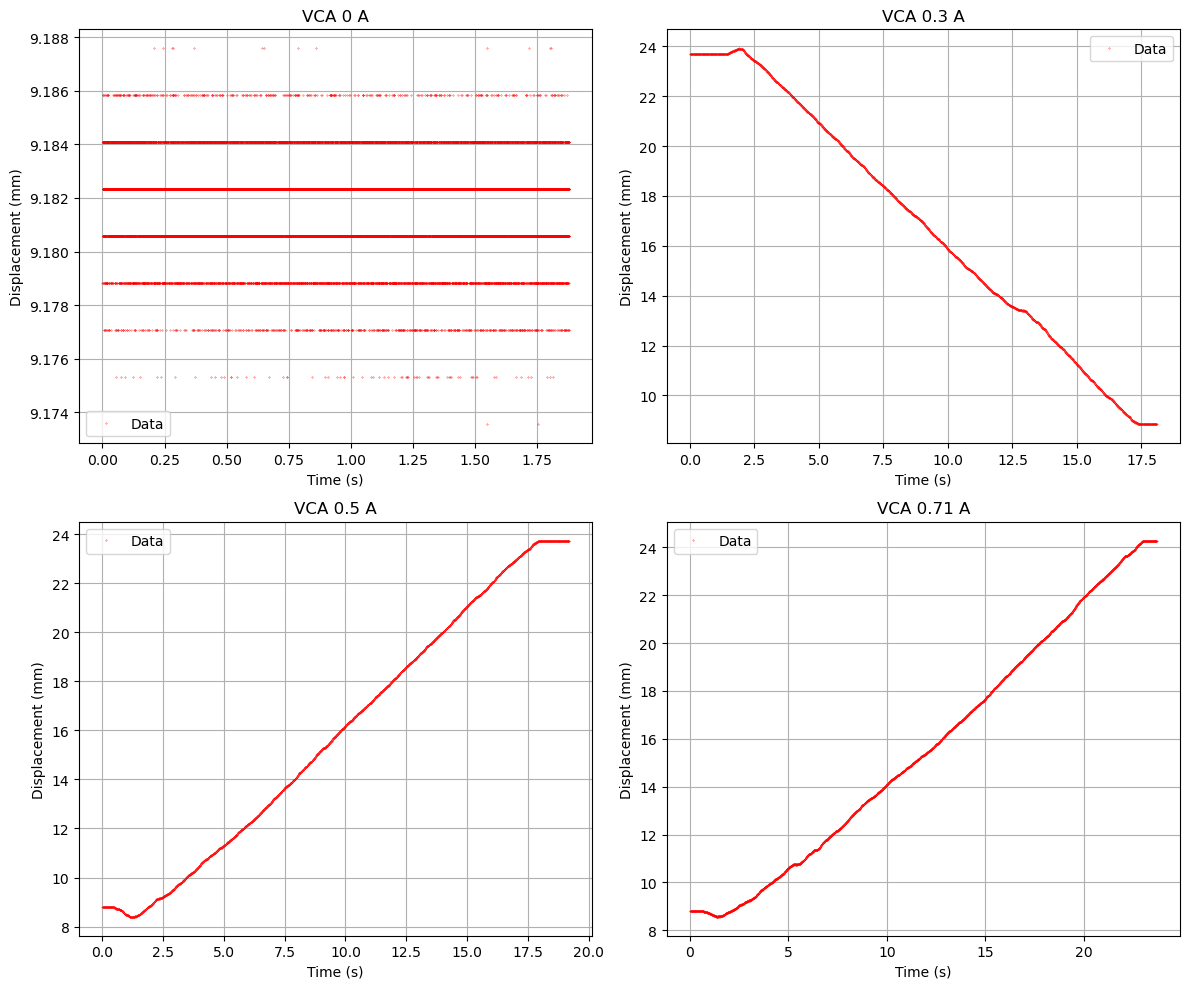

In [342]:
# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define spring data and titles with elbow points for pre-tensioned springs
VCA_data = [
    (partB0A, 'VCA 0 A', (0, 0), 0),    # start at x=1.45mm
    (partB0_3A, 'VCA 0.3 A', (0, 1), 0.3),    # start at x=1.45mm
    (partB0_5A, 'VCA 0.5 A', (1, 0), 0.5),    # start at origin
    (partB0_71A, 'VCA 0.71 A', (1, 1), 0.71)     # start at origin
]

# Process each spring
for data, title, (i, j), current in VCA_data:
    
    # Plot all data points
    axs[i, j].plot(data['Time (s)'], data['Displacement (mm)'], '.', 
                   color='r', markersize=0.5, label='Data')
    
    # # Calculate and plot the mean as a horizontal line
    # mean_value = data['Displacement (mm)'].mean()
    # axs[i, j].axhline(mean_value, color='blue', linestyle='--', linewidth=1,
    #                   label=f'Mean: {mean_value:.2f}')
    
    # Plot fit only for the filtered portion (if applicable)
    # axs[i, j].plot(x_data, y_fit, '-', 
    #                color='b', linewidth=1, label=f'Fitted Line: {equation}')
    
    # Add title and labels with fit parameters
    axs[i, j].set_title(f'{title}')
    axs[i, j].set_xlabel('Time (s)')
    axs[i, j].set_ylabel('Displacement (mm)')
    axs[i, j].grid(True)
    axs[i, j].legend()

plt.tight_layout()
plt.show()


In [343]:
avg_speeds = []

for df, title, (i, j), current in VCA_data:
    # Find the index of the maximum and minimum displacement
    max_disp_idx = df['Displacement (mm)'].idxmax()
    min_disp_idx = df['Displacement (mm)'].idxmin()
    
    # Calculate the total displacement
    total_displacement = df['Displacement (mm)'].iloc[max_disp_idx] - df['Displacement (mm)'].iloc[min_disp_idx]
    
    # Calculate the total time between max and min displacement
    total_time = df['Time (s)'].iloc[max_disp_idx] - df['Time (s)'].iloc[min_disp_idx]
    
    # Calculate the average speed (in mm/s)
    average_speed = abs(total_displacement / total_time) if total_time != 0 else 0

    avg_speeds.append(average_speed)

print(avg_speeds[0])

0.0104647819501526


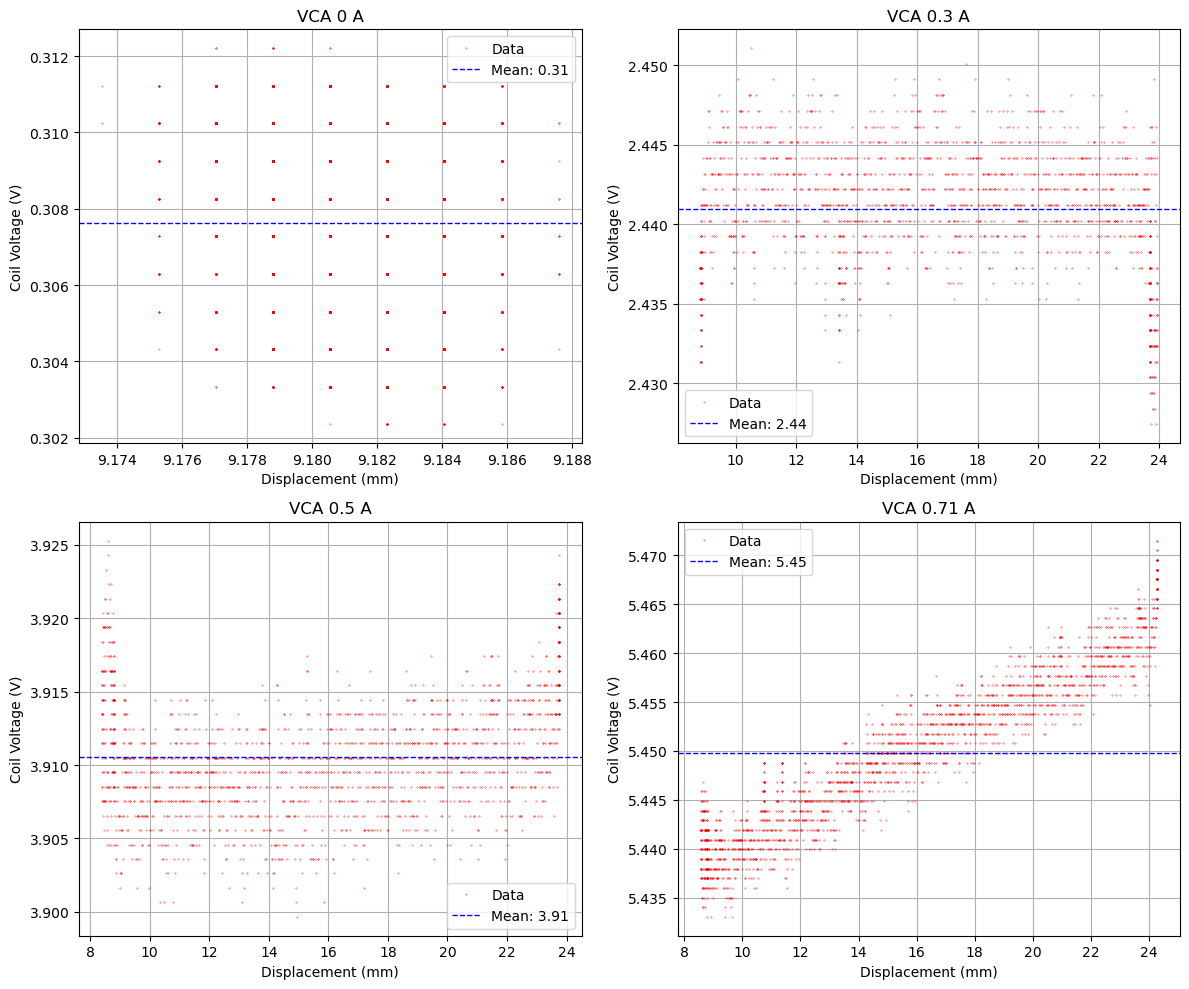

In [344]:
# plot voltage and displacement

# Convert the F(x) graph to Bl(x)

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define spring data and titles with elbow points for pre-tensioned springs
VCA_data = [
    (partB0A, 'VCA 0 A', (0, 0), 0),    # start at x=1.45mm
    (partB0_3A, 'VCA 0.3 A', (0, 1), 0.3),    # start at x=1.45mm
    (partB0_5A, 'VCA 0.5 A', (1, 0), 0.5),    # start at origin
    (partB0_71A, 'VCA 0.71 A', (1, 1), 0.71)     # start at origin
]

# Process each spring
for data, title, (i, j), current in VCA_data:
    
    # Plot all data points
    axs[i, j].plot(data['Displacement (mm)'], data['Coil Voltage (V)'], '.', 
                   color='r', markersize=0.5, label='Data')
    
    # Calculate and plot the mean as a horizontal line
    mean_value = data['Coil Voltage (V)'].mean()
    axs[i, j].axhline(mean_value, color='blue', linestyle='--', linewidth=1,
                      label=f'Mean: {mean_value:.2f}')
    
    # Add title and labels with fit parameters
    axs[i, j].set_title(f'{title}')
    axs[i, j].set_xlabel('Displacement (mm)')
    axs[i, j].set_ylabel('Coil Voltage (V)')
    axs[i, j].grid(True)
    axs[i, j].legend()

plt.tight_layout()
plt.show()


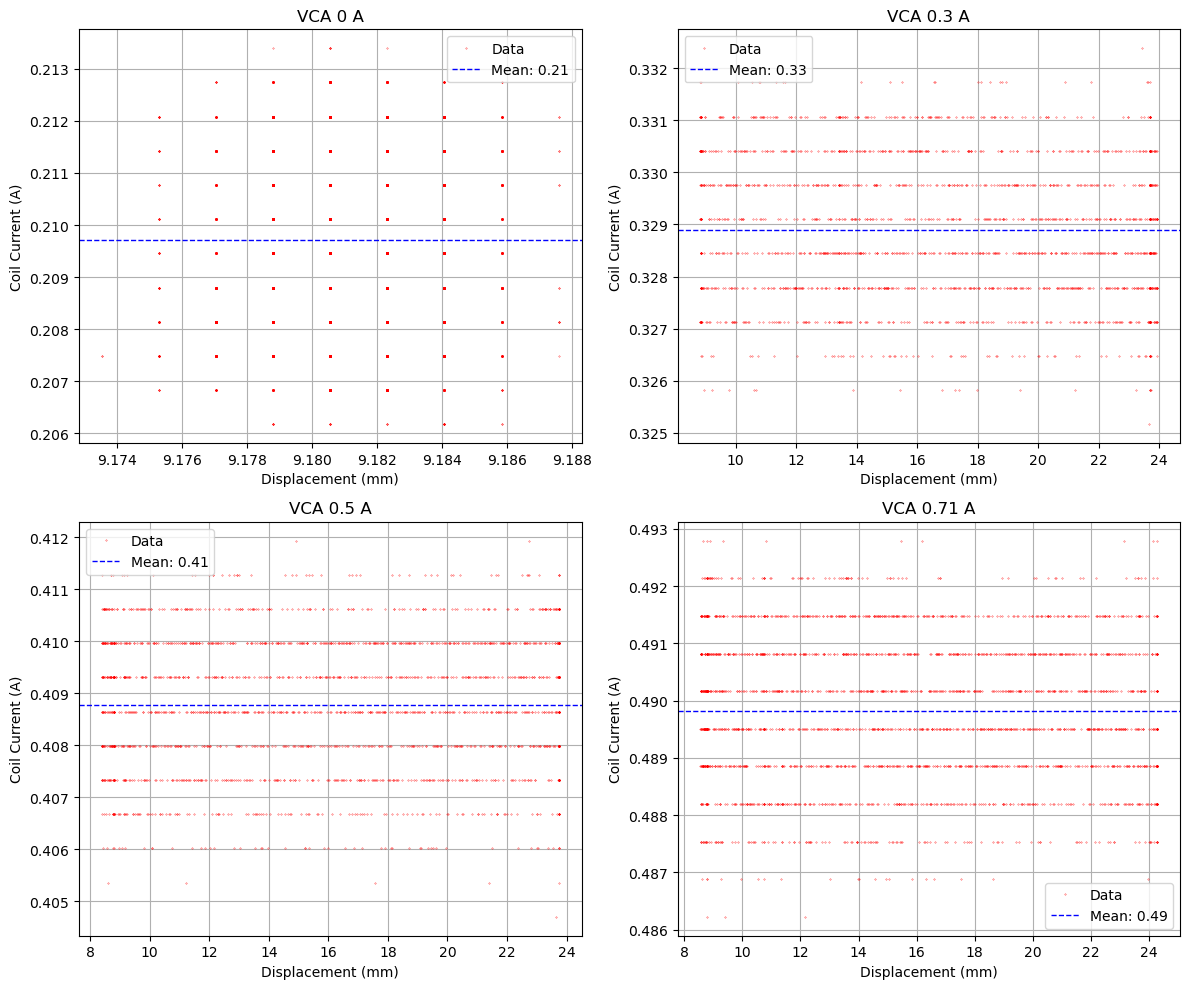

In [345]:
# plot voltage and displacement

# Convert the F(x) graph to Bl(x)

# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Define spring data and titles with elbow points for pre-tensioned springs
VCA_data = [
    (partB0A, 'VCA 0 A', (0, 0), 0),    # start at x=1.45mm
    (partB0_3A, 'VCA 0.3 A', (0, 1), 0.3),    # start at x=1.45mm
    (partB0_5A, 'VCA 0.5 A', (1, 0), 0.5),    # start at origin
    (partB0_71A, 'VCA 0.71 A', (1, 1), 0.71)     # start at origin
]

# Process each spring
for data, title, (i, j), current in VCA_data:
    
    # Plot all data points
    axs[i, j].plot(data['Displacement (mm)'], data['Coil Current (A)'], '.', 
                   color='r', markersize=0.5, label='Data')
    
    # Calculate and plot the mean as a horizontal line
    mean_value = data['Coil Current (A)'].mean()
    axs[i, j].axhline(mean_value, color='blue', linestyle='--', linewidth=1,
                      label=f'Mean: {mean_value:.2f}')
    
    # Add title and labels with fit parameters
    axs[i, j].set_title(f'{title}')
    axs[i, j].set_xlabel('Displacement (mm)')
    axs[i, j].set_ylabel('Coil Current (A)')
    axs[i, j].grid(True)
    axs[i, j].legend()

plt.tight_layout()
plt.show()


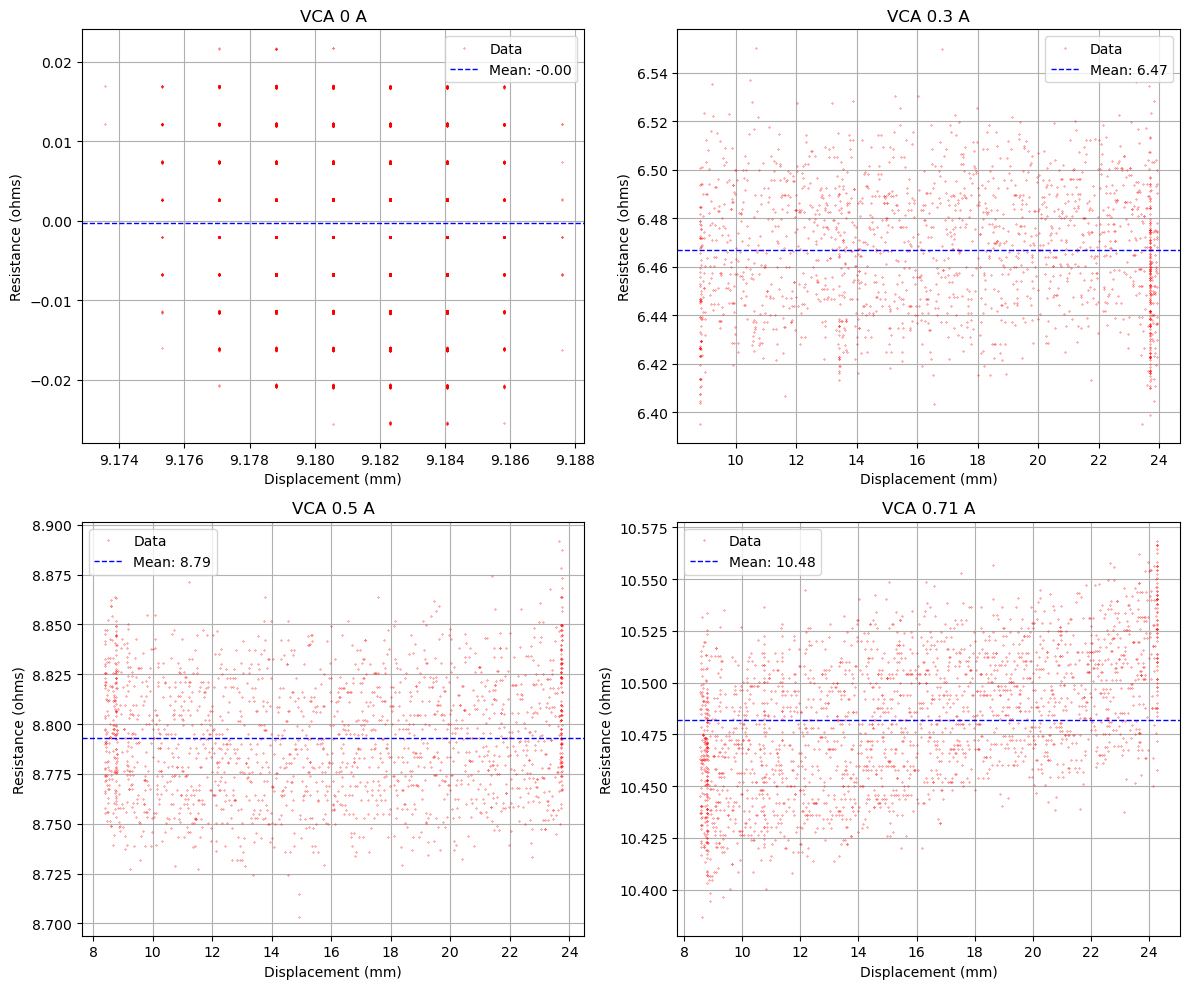

In [346]:
# Create figure with subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

count = 0
removeoffsetvoltage = partB0A['Coil Voltage (V)'].mean()

# Define spring data and titles with elbow points for pre-tensioned springs
VCA_data = [
    (partB0A, 'VCA 0 A', (0, 0), 0),    # start at x=1.45mm
    (partB0_3A, 'VCA 0.3 A', (0, 1), 0.3),    # start at x=1.45mm
    (partB0_5A, 'VCA 0.5 A', (1, 0), 0.5),    # start at origin
    (partB0_71A, 'VCA 0.71 A', (1, 1), 0.71)     # start at origin
]

# Process each spring
for data, title, (i, j), current in VCA_data:
    data['Coil Voltage (V)'] -= removeoffsetvoltage

    data['Resistance'] = (data['Coil Voltage (V)'] - (data['Bl (constant)']*avg_speeds[count]/1000))/data['Coil Current (A)']

    # Plot all data points
    axs[i, j].plot(data['Displacement (mm)'], data['Resistance'], '.', 
                   color='r', markersize=0.5, label='Data')
    
    count += 1
    # Calculate and plot the mean as a horizontal line
    mean_value = data['Resistance'].mean()
    axs[i, j].axhline(mean_value, color='blue', linestyle='--', linewidth=1,
                      label=f'Mean: {mean_value:.2f}')
    
    # Add title and labels with fit parameters
    axs[i, j].set_title(f'{title}')
    axs[i, j].set_xlabel('Displacement (mm)')
    axs[i, j].set_ylabel('Resistance (ohms)')
    axs[i, j].grid(True)
    axs[i, j].legend()

plt.tight_layout()
plt.show()


In [347]:
resistance_means = []
sum = 0

for data, title, _, _ in VCA_data:
    # Access the DataFrame from the tuple
    mean = data['Resistance'].mean()
    resistance_means.append(mean)
print(resistance_means)

for i in range(1,4):
    sum += resistance_means[i]
    mean = sum/3

print('Experimental Resistance constant: ')
print(mean)

[-0.0003133562658784661, 6.467064777174758, 8.792890741153531, 10.48189830933221]
Experimental Resistance constant: 
8.5806179425535


# Part B - sine waves

In [348]:
f1Hzdata = pd.read_excel('PartB_1Hz.xlsx', skiprows = 1)
f5Hzdata = pd.read_excel('PartB_5Hz.xlsx', skiprows = 1)
f10Hzdata = pd.read_excel('PartB_10Hz.xlsx', skiprows = 1)
f20Hzdata = pd.read_excel('PartB_20Hz.xlsx', skiprows = 1)
f50Hzdata = pd.read_excel('PartB_50Hz.xlsx', skiprows = 1)
f100Hzdata = pd.read_excel('PartB_100Hz.xlsx', skiprows = 1)
f200Hzdata = pd.read_excel('PartB_200Hz.xlsx', skiprows = 1)
f400Hzdata = pd.read_excel('PartB_400Hz.xlsx', skiprows = 1)
f600Hzdata = pd.read_excel('PartB_600Hz.xlsx', skiprows = 1)
f800Hzdata = pd.read_excel('PartB_800Hz.xlsx', skiprows = 1)
f1000Hzdata = pd.read_excel('PartB_1kHz.xlsx', skiprows = 1)

# Create a list of DataFrames
frequency_data = [
    (f1Hzdata, 0.1, 1, 0, 0),
    (f5Hzdata, 0.1, 5, 0, 0),
    (f10Hzdata, 0.1, 10, 0, 0),
    (f20Hzdata, 0.1, 20, 0, 0),
    (f50Hzdata, 0.1, 50, 0, 0),
    (f100Hzdata, 0.1, 100, 0, 0),
    (f200Hzdata, 0.1, 200, 0, 0),
    (f400Hzdata, 0.1, 400, 0, 0),
    (f600Hzdata, 0.1, 600, 0, 0),
    (f800Hzdata, 0.1, 800, 0, 0),
    (f1000Hzdata, 0.1, 1000, 0, 0)]



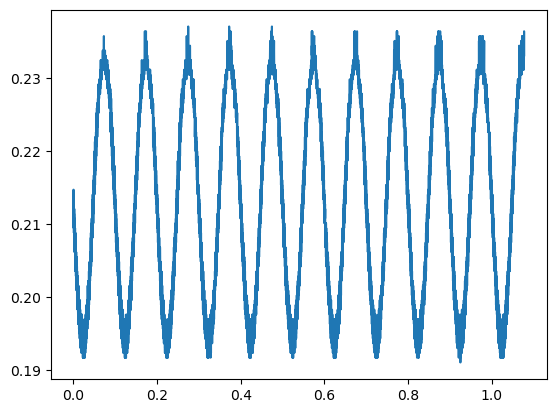

In [349]:
time = f10Hzdata['Time (s)']
voltage = f10Hzdata['Coil Current (A)']

plt.plot(time, voltage)
plt.show()

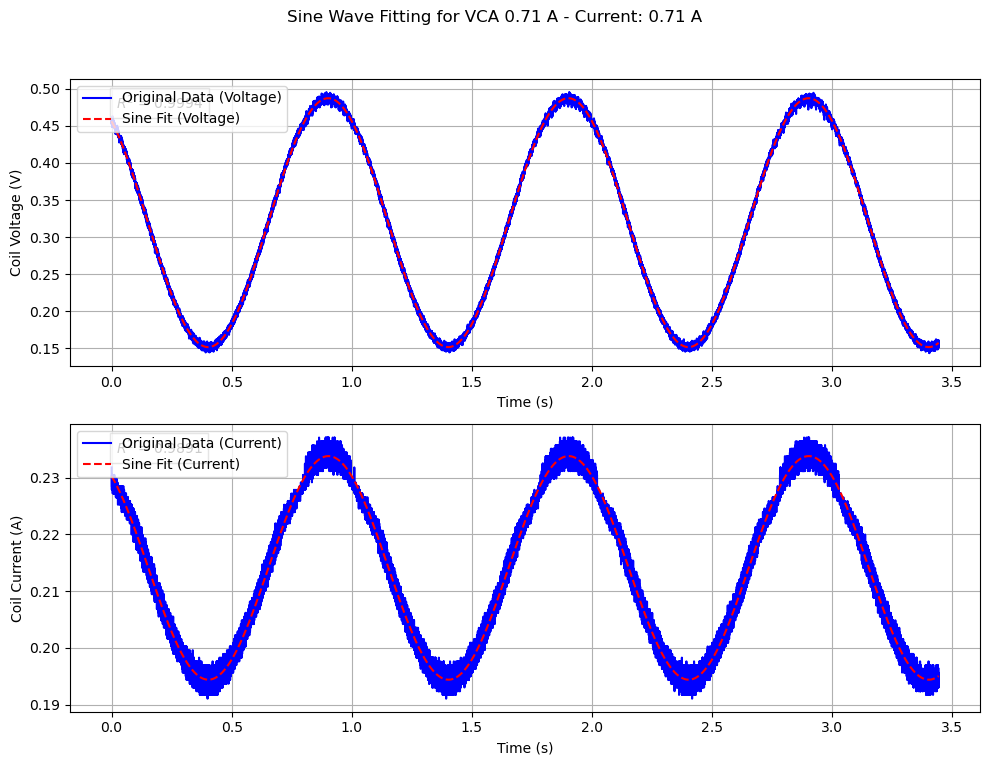

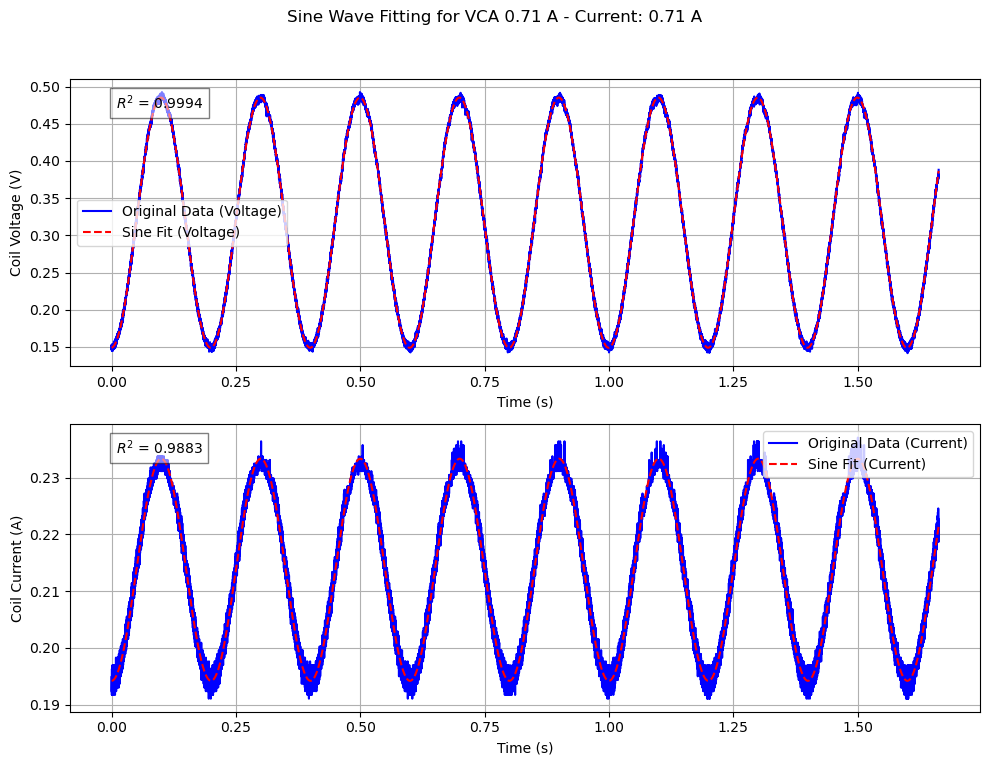

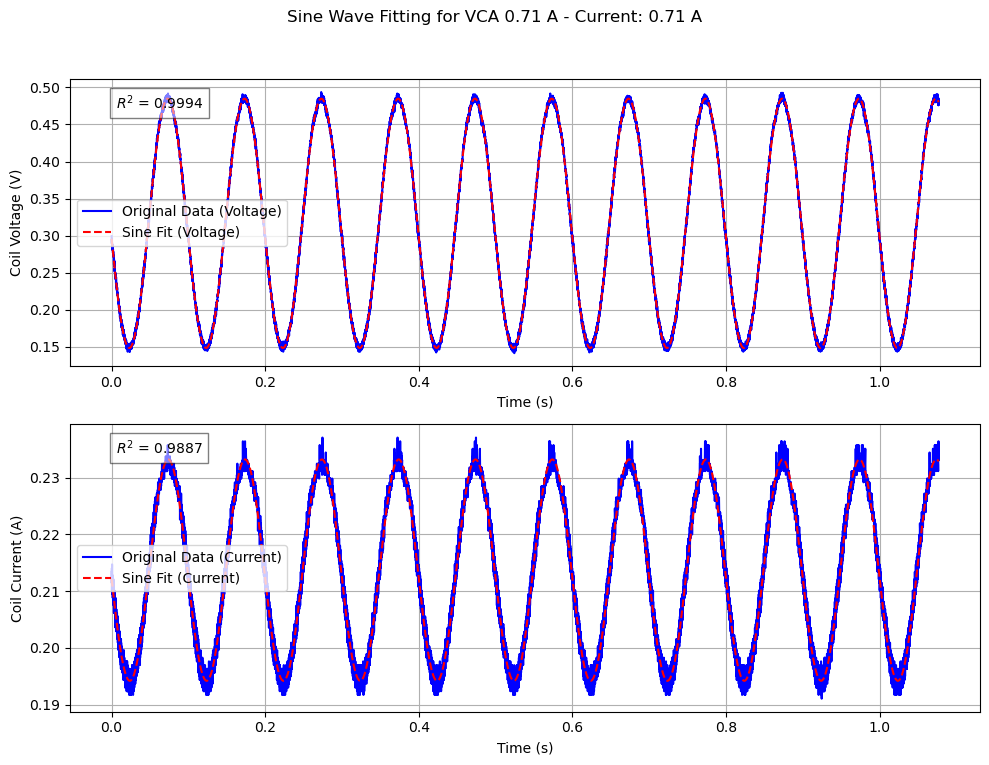

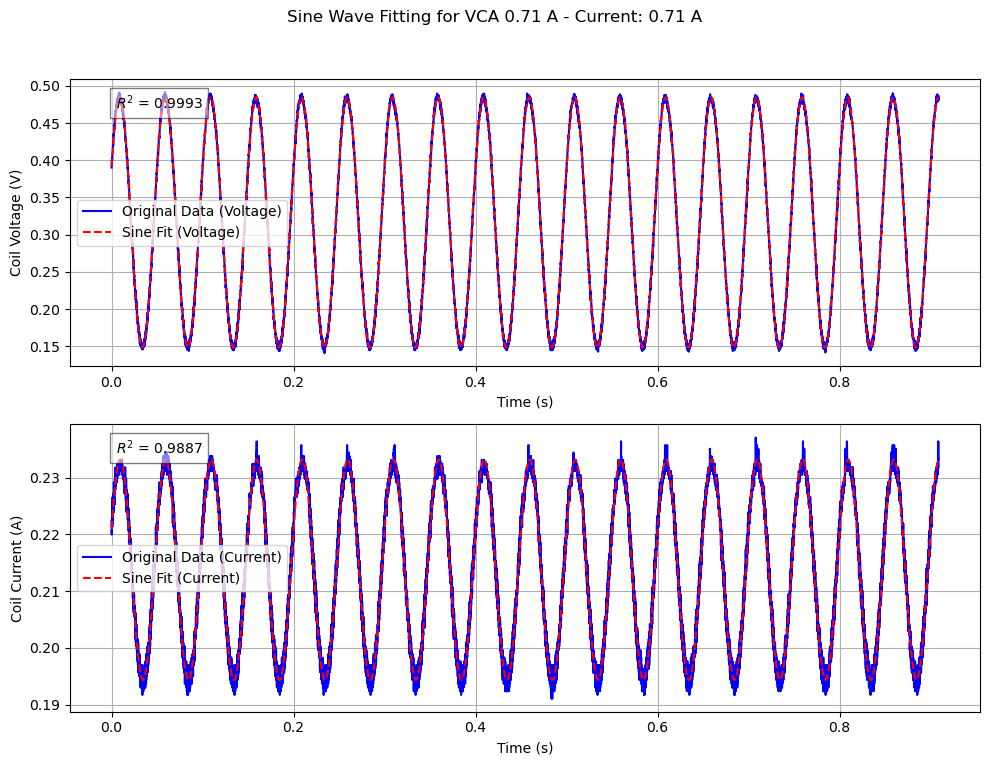

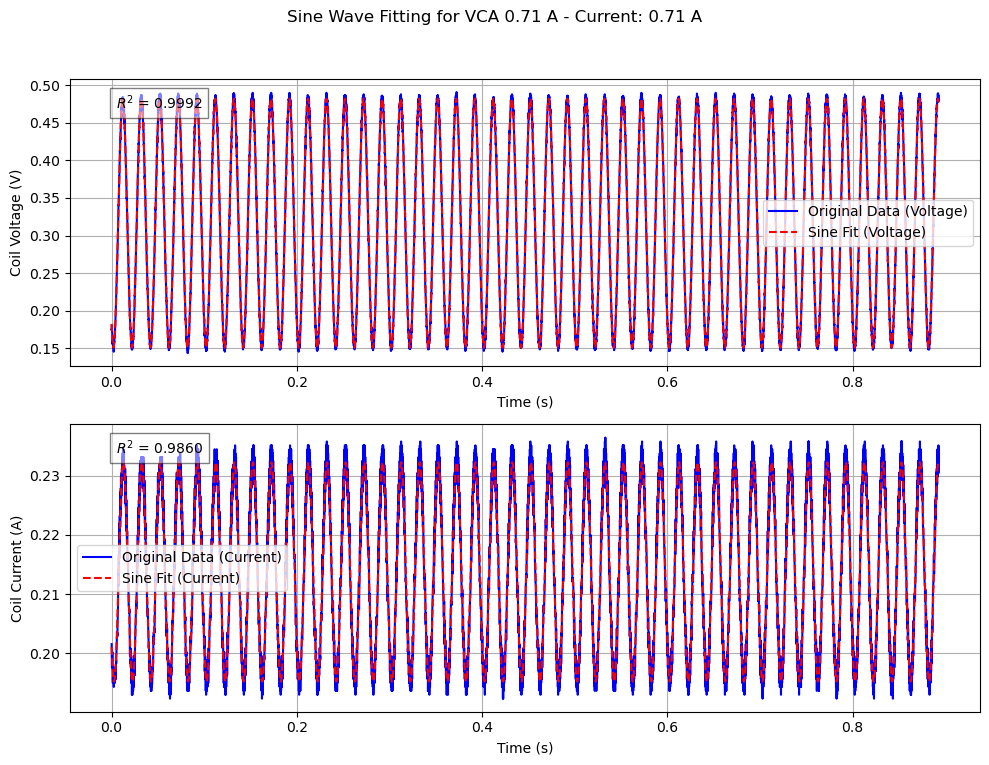

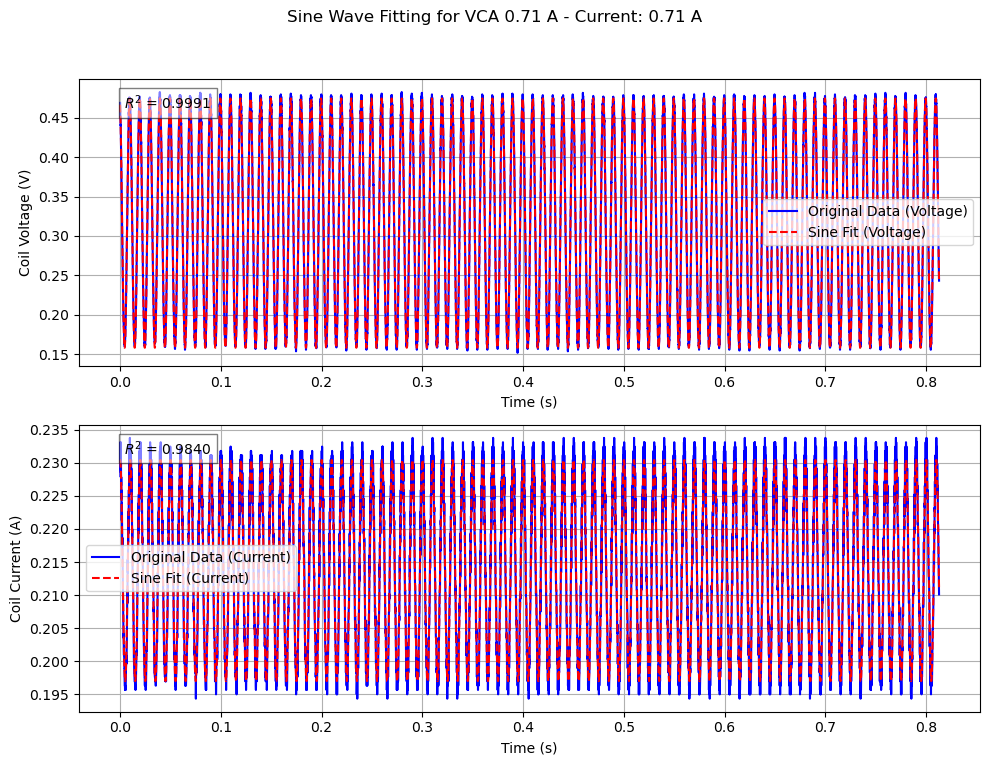

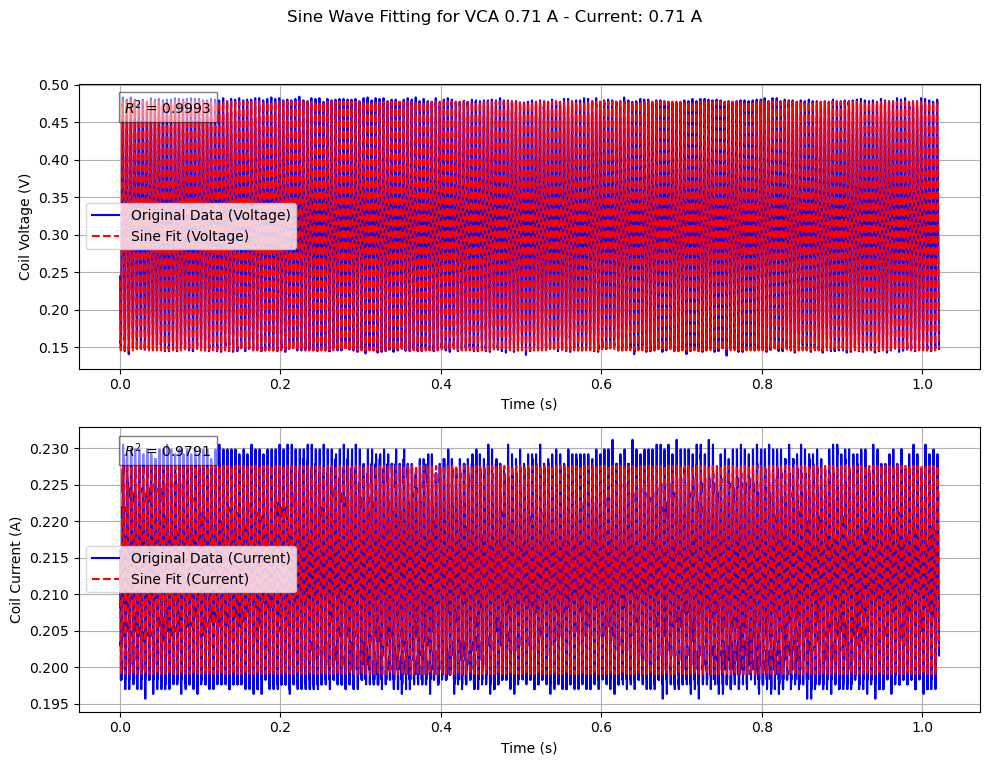

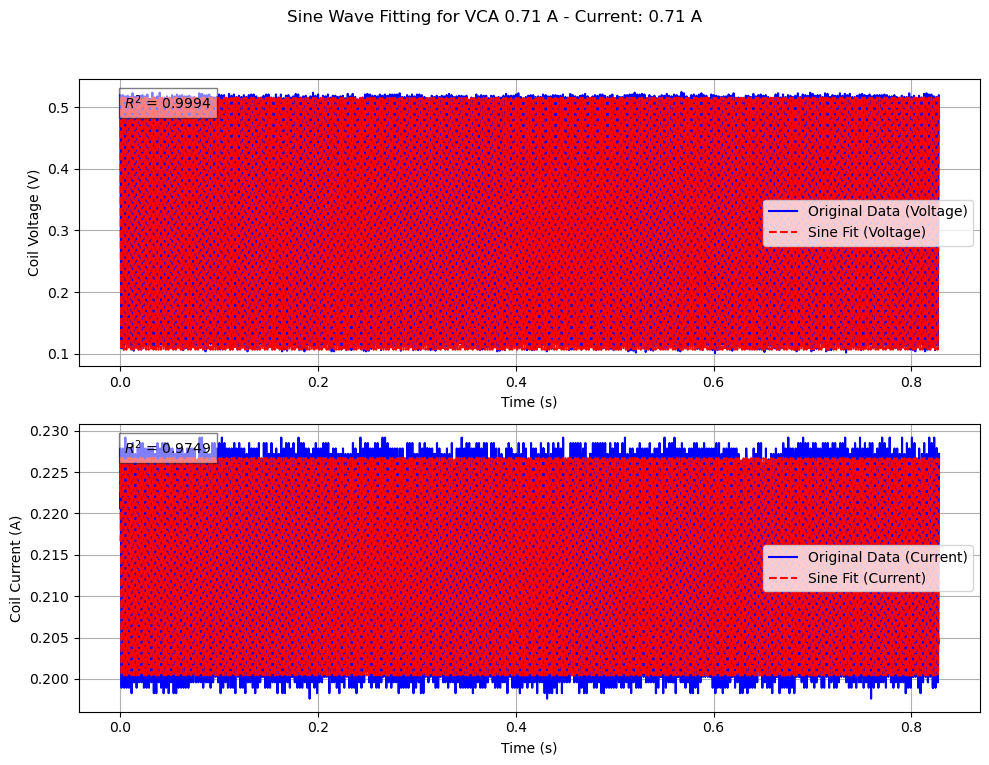

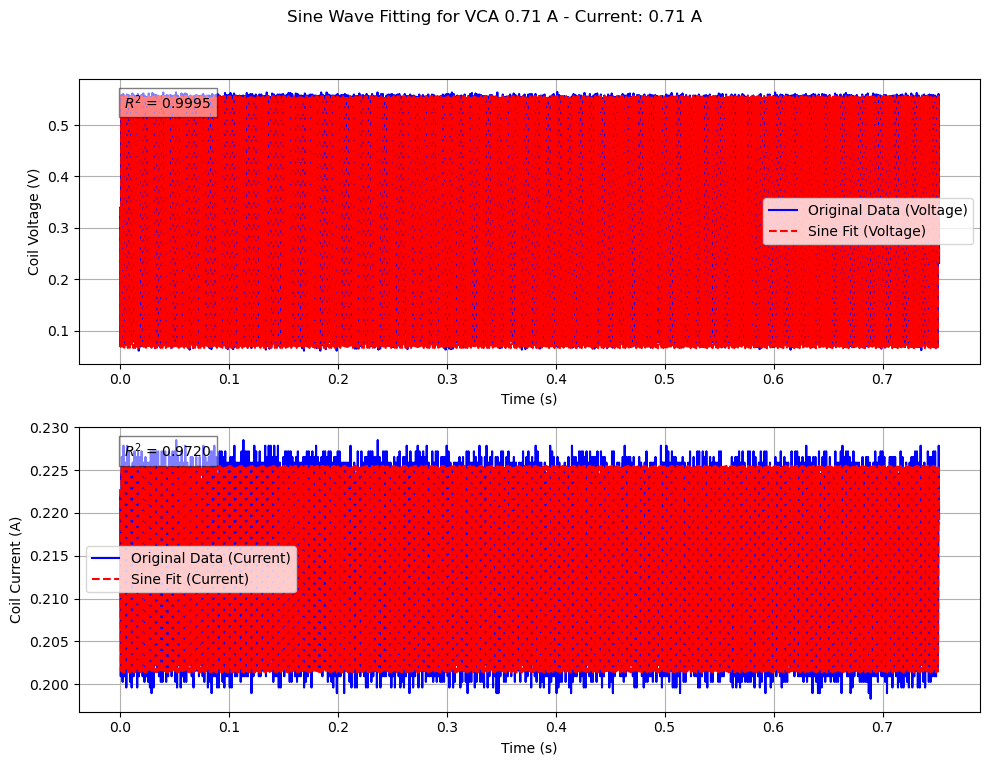

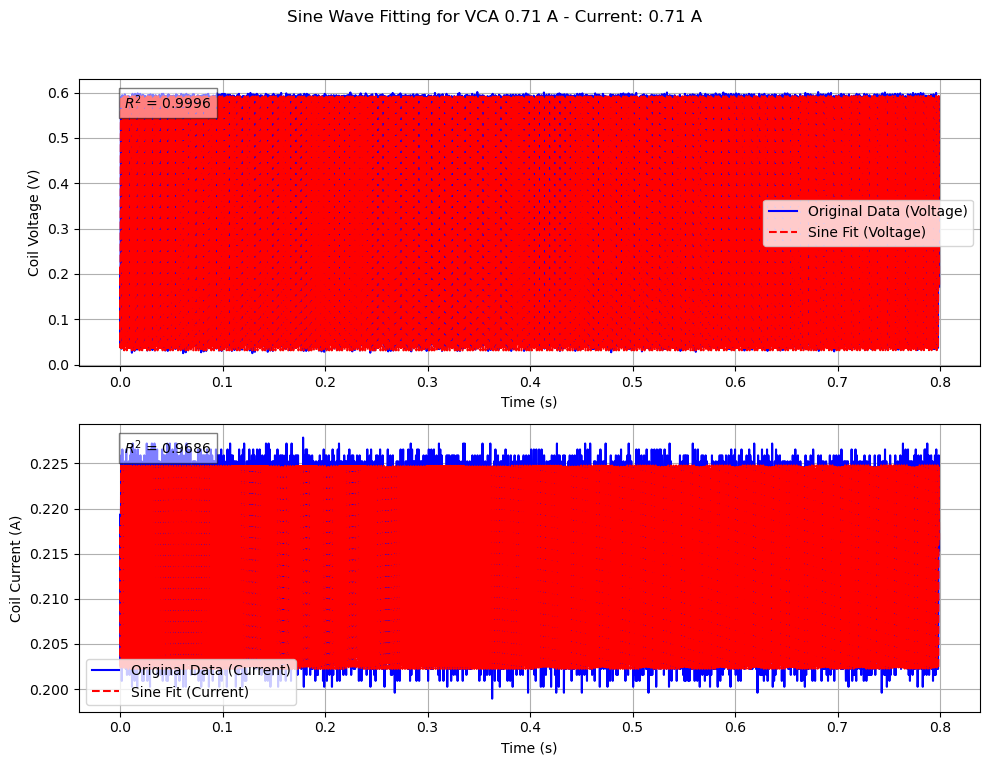

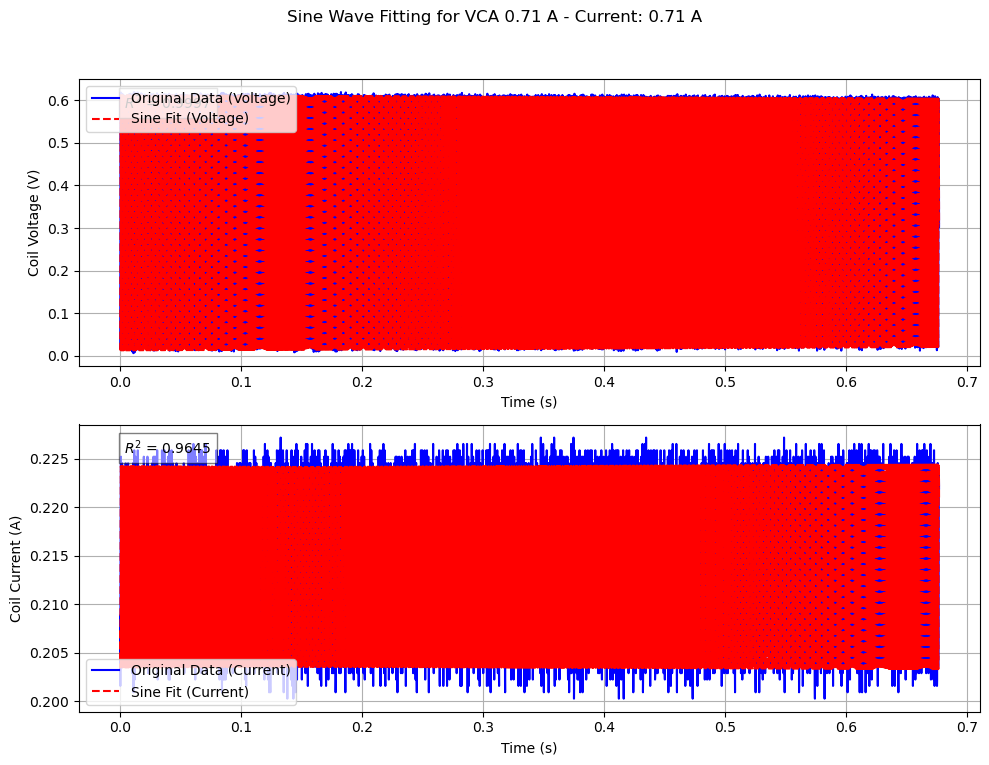


Results for 1 Hz:
Voltage fit:
  amplitude: 0.1678
  frequency: 1.0001
  phase: 2.1885
  offset: 0.3195
  R² score: 0.9994
Current fit:
  amplitude: -0.0197
  frequency: 1.0003
  phase: -0.9611
  offset: 0.2141
  R² score: 0.9891

Results for 5 Hz:
Voltage fit:
  amplitude: 0.1681
  frequency: 4.9997
  phase: 4.7366
  offset: 0.3171
  R² score: 0.9994
Current fit:
  amplitude: 0.0196
  frequency: 4.9995
  phase: -1.5671
  offset: 0.2138
  R² score: 0.9883

Results for 10 Hz:
Voltage fit:
  amplitude: -0.1680
  frequency: 9.9997
  phase: 0.1176
  offset: 0.3167
  R² score: 0.9994
Current fit:
  amplitude: -0.0195
  frequency: 9.9998
  phase: 0.0734
  offset: 0.2137
  R² score: 0.9887

Results for 20 Hz:
Voltage fit:
  amplitude: 0.1682
  frequency: 19.9994
  phase: 0.4542
  offset: 0.3164
  R² score: 0.9993
Current fit:
  amplitude: 0.0194
  frequency: 19.9994
  phase: 0.3708
  offset: 0.2138
  R² score: 0.9887

Results for 50 Hz:
Voltage fit:
  amplitude: 0.1654
  frequency: 49.9989
 

In [350]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from dataclasses import dataclass
from typing import List, Dict, Optional

@dataclass
class FittedParameters:
    frequency: float
    voltage_params: Dict[str, float]
    current_params: Dict[str, float]
    voltage_r2: float
    current_r2: float
    
# Store fitted parameters for each frequency profile
fitted_results: List[FittedParameters] = []

# Define a sine wave function for fitting
def sine_wave(t, A, f, phi, C):
    return A * np.sin(2 * np.pi * f * t + phi) + C

# Define a function to calculate R^2
def r_squared(y, y_fit):
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

# Helper function to clean NaNs and infs
def clean_data(time, signal):
    mask = np.isfinite(signal)
    return time[mask], signal[mask]

# Process each VCA data entry
for df, amp, freq, phase, offset in frequency_data:
    # Extract time, coil voltage, and coil current data
    time = df['Time (s)']
    coil_voltage = df['Coil Voltage (V)']
    coil_current = df['Coil Current (A)']

    # Define initial guess for parameters
    initial_guess = [amp, freq, phase, offset]

    # Clean the data
    time_clean, coil_voltage_clean = clean_data(time, coil_voltage)
    _, coil_current_clean = clean_data(time, coil_current)

    try:
        # Fit voltage data
        params_voltage, _ = curve_fit(sine_wave, time_clean, coil_voltage_clean, p0=initial_guess, maxfev=5000)
        fitted_voltage = sine_wave(time, *params_voltage)
        r2_voltage = r_squared(coil_voltage_clean, fitted_voltage)
        
        # Fit current data
        params_current, _ = curve_fit(sine_wave, time_clean, coil_current_clean, p0=initial_guess, maxfev=5000)
        fitted_current = sine_wave(time, *params_current)
        r2_current = r_squared(coil_current_clean, fitted_current)

        fitted_params = FittedParameters(
                frequency=freq,
                voltage_params={
                'amplitude': params_voltage[0],
                'frequency': params_voltage[1],
                'phase': params_voltage[2],
                'offset': params_voltage[3]
                },
                current_params={
                'amplitude': params_current[0],
                'frequency': params_current[1],
                'phase': params_current[2],
                'offset': params_current[3]
                },
                voltage_r2=r2_voltage,
                current_r2=r2_current
            )

        fitted_results.append(fitted_params)

        # Plotting results with R^2 displayed
        fig, axs = plt.subplots(2, 1, figsize=(10, 8))
        fig.suptitle(f"Sine Wave Fitting for {title} - Current: {current} A")

        # Plot 'Coil Voltage (V)' fit
        axs[0].plot(time_clean, coil_voltage_clean, 'b-', label='Original Data (Voltage)')
        axs[0].plot(time_clean, fitted_voltage, 'r--', label='Sine Fit (Voltage)')
        axs[0].set_xlabel("Time (s)")
        axs[0].set_ylabel("Coil Voltage (V)")
        axs[0].legend()
        axs[0].grid()
        axs[0].text(0.05, 0.95, f"$R^2$ = {r2_voltage:.4f}", transform=axs[0].transAxes, 
                    verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

        # Plot 'Coil Current (A)' fit
        axs[1].plot(time_clean, coil_current_clean, 'b-', label='Original Data (Current)')
        axs[1].plot(time_clean, fitted_current, 'r--', label='Sine Fit (Current)')
        axs[1].set_xlabel("Time (s)")
        axs[1].set_ylabel("Coil Current (A)")
        axs[1].legend()
        axs[1].grid()
        axs[1].text(0.05, 0.95, f"$R^2$ = {r2_current:.4f}", transform=axs[1].transAxes, 
                    verticalalignment='top', fontsize=10, bbox=dict(facecolor='white', alpha=0.5))

        plt.tight_layout(rect=[0, 0.03, 1, 0.95])
        plt.show()

    except RuntimeError as e:
        print(f"Fitting failed for frequency {freq} Hz: {str(e)}")
        continue

# Example of how to access the stored results
for result in fitted_results:
    print(f"\nResults for {result.frequency} Hz:")
    print("Voltage fit:")
    for param, value in result.voltage_params.items():
        print(f"  {param}: {value:.4f}")
    print(f"  R² score: {result.voltage_r2:.4f}")
    
    print("Current fit:")
    for param, value in result.current_params.items():
        print(f"  {param}: {value:.4f}")
    print(f"  R² score: {result.current_r2:.4f}")

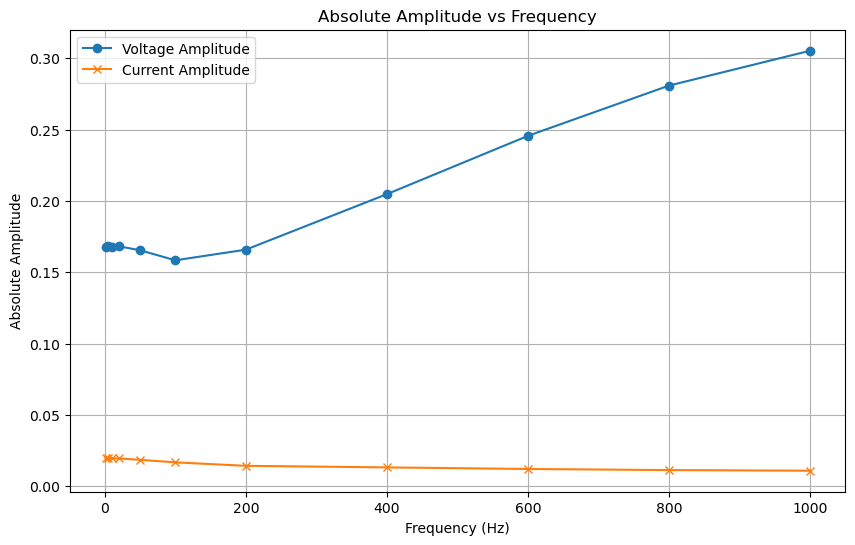

In [351]:
import matplotlib.pyplot as plt

# Extract frequencies and corresponding absolute amplitudes from fitted_results
frequencies = [result.frequency for result in fitted_results]
voltage_amplitudes = [abs(result.voltage_params['amplitude']) for result in fitted_results]
current_amplitudes = [abs(result.current_params['amplitude']) for result in fitted_results]

# Plot the absolute amplitude with respect to frequency
plt.figure(figsize=(10, 6))
plt.plot(frequencies, voltage_amplitudes, label='Voltage Amplitude', marker='o')
plt.plot(frequencies, current_amplitudes, label='Current Amplitude', marker='x')

# Set up the labels and title
plt.xlabel('Frequency (Hz)')
plt.ylabel('Absolute Amplitude')
plt.title('Absolute Amplitude vs Frequency')
plt.legend()
plt.grid(True)
plt.show()


In [352]:
import numpy as np
from dataclasses import dataclass
from typing import List, Dict, Optional

@dataclass
class ImpedanceResult:
    frequency: float
    magnitude: float  # |Z| in ohms
    phase: float     # φ in radians
    real: float      # R (resistance) in ohms
    imaginary: float # X (reactance) in ohms

def calculate_impedance(voltage_params: Dict[str, float], 
                       current_params: Dict[str, float], 
                       frequency: float) -> ImpedanceResult:
    """
    Calculate impedance from voltage and current sine wave parameters.
    
    Args:
        voltage_params: Dictionary containing voltage sine wave parameters (amplitude, phase)
        current_params: Dictionary containing current sine wave parameters (amplitude, phase)
        frequency: Frequency of the signals in Hz
    
    Returns:
        ImpedanceResult object containing impedance magnitude, phase, and complex components
    """
    # Extract amplitudes and phases
    V_amplitude = voltage_params['amplitude']
    I_amplitude = current_params['amplitude']
    V_phase = voltage_params['phase']
    I_phase = current_params['phase']
    
    # Calculate impedance magnitude (|Z| = V_amplitude / I_amplitude)
    Z_magnitude = abs(V_amplitude / I_amplitude)
    
    # Calculate phase difference (φ = φ_voltage - φ_current)
    # Positive phase difference means voltage leads current
    phase_difference = V_phase - I_phase
    
    # # Normalize phase difference to [-π, π]
    # phase_difference = np.arctan2(np.sin(phase_difference), np.cos(phase_difference))
    
    # Calculate real (resistance) and imaginary (reactance) components
    Z_real = Z_magnitude * np.cos(phase_difference)      # R = |Z| * cos(φ)
    Z_imaginary = Z_magnitude * np.sin(phase_difference) # X = |Z| * sin(φ)
    
    return ImpedanceResult(
        frequency=frequency,
        magnitude=Z_magnitude,
        phase=phase_difference,
        real=Z_real,
        imaginary=Z_imaginary
    )

# Function to calculate impedance for all fitted results
def calculate_impedance_profile(fitted_results: List[FittedParameters]) -> List[ImpedanceResult]:
    """
    Calculate impedance for a list of fitted voltage and current parameters.
    """
    impedance_profile = []
    
    for result in fitted_results:
        impedance = calculate_impedance(
            result.voltage_params,
            result.current_params,
            result.frequency
        )
        impedance_profile.append(impedance)
    
    return impedance_profile

# Example usage:
impedance_results = calculate_impedance_profile(fitted_results)

# Print results
for imp in impedance_results:
    print(f"\nImpedance at {imp.frequency:.1f} Hz:")
    print(f"Magnitude: {imp.magnitude:.2f} Ω")
    print(f"Phase: {np.degrees(imp.phase):.2f}°")
    print(f"Real part (R): {imp.real:.2f} Ω")
    print(f"Imaginary part (X): {imp.imaginary:.2f} Ω")




Impedance at 1.0 Hz:
Magnitude: 8.51 Ω
Phase: 180.46°
Real part (R): -8.51 Ω
Imaginary part (X): -0.07 Ω

Impedance at 5.0 Hz:
Magnitude: 8.59 Ω
Phase: 361.17°
Real part (R): 8.59 Ω
Imaginary part (X): 0.18 Ω

Impedance at 10.0 Hz:
Magnitude: 8.61 Ω
Phase: 2.53°
Real part (R): 8.61 Ω
Imaginary part (X): 0.38 Ω

Impedance at 20.0 Hz:
Magnitude: 8.66 Ω
Phase: 4.78°
Real part (R): 8.63 Ω
Imaginary part (X): 0.72 Ω

Impedance at 50.0 Hz:
Magnitude: 8.95 Ω
Phase: -169.35°
Real part (R): -8.80 Ω
Imaginary part (X): -1.65 Ω

Impedance at 100.0 Hz:
Magnitude: 9.47 Ω
Phase: 20.37°
Real part (R): 8.88 Ω
Imaginary part (X): 3.30 Ω

Impedance at 200.0 Hz:
Magnitude: 11.62 Ω
Phase: 33.17°
Real part (R): 9.72 Ω
Imaginary part (X): 6.36 Ω

Impedance at 400.0 Hz:
Magnitude: 15.56 Ω
Phase: 40.92°
Real part (R): 11.75 Ω
Imaginary part (X): 10.19 Ω

Impedance at 600.0 Hz:
Magnitude: 20.36 Ω
Phase: 44.34°
Real part (R): 14.56 Ω
Imaginary part (X): 14.23 Ω

Impedance at 800.0 Hz:
Magnitude: 24.89 Ω
Phase:

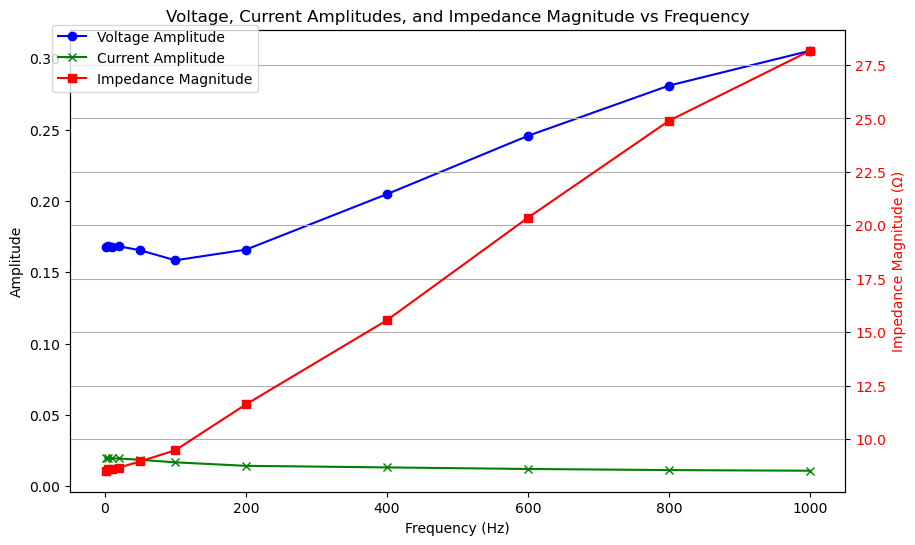

In [353]:
import matplotlib.pyplot as plt
import numpy as np

# Extract frequencies and corresponding values from fitted_results
frequencies = [result.frequency for result in fitted_results]
voltage_amplitudes = [abs(result.voltage_params['amplitude']) for result in fitted_results]
current_amplitudes = [abs(result.current_params['amplitude']) for result in fitted_results]

# Calculate impedance results
impedance_results = calculate_impedance_profile(fitted_results)
impedance_magnitudes = [imp.magnitude for imp in impedance_results]

# Plot the voltage, current amplitudes, and impedance magnitude
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot voltage and current amplitudes on primary y-axis
ax1.plot(frequencies, voltage_amplitudes, label='Voltage Amplitude', marker='o', color='blue')
ax1.plot(frequencies, current_amplitudes, label='Current Amplitude', marker='x', color='green')
ax1.set_xlabel('Frequency (Hz)')
ax1.set_ylabel('Amplitude', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Set up the title
plt.title('Voltage, Current Amplitudes, and Impedance Magnitude vs Frequency')

# Create a secondary y-axis for impedance magnitude
ax2 = ax1.twinx()
ax2.plot(frequencies, impedance_magnitudes, label='Impedance Magnitude', marker='s', color='red')
ax2.set_ylabel('Impedance Magnitude (Ω)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Combine legends from both y-axes
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

# Add grid and show the plot
plt.grid(True)
plt.show()


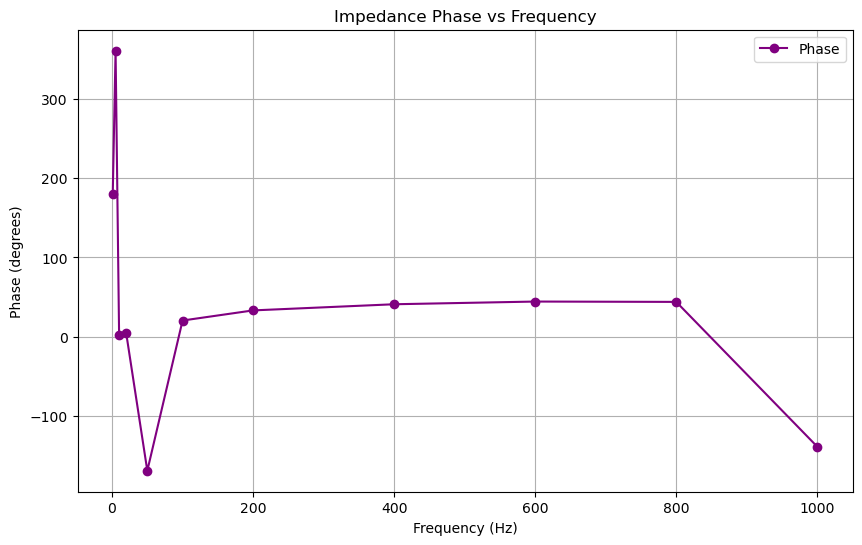

In [354]:
# Extract frequencies and corresponding phase values from impedance_results
frequencies = [imp.frequency for imp in impedance_results]
phases = [np.degrees(imp.phase) for imp in impedance_results]  # Convert phase to degrees for better interpretation

# Plot the phase with respect to frequency
plt.figure(figsize=(10, 6))
plt.plot(frequencies, phases, label='Phase', marker='o', color='purple')

# Set up labels and title
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (degrees)')
plt.title('Impedance Phase vs Frequency')
plt.grid(True)

# Add legend and show plot
plt.legend()
plt.show()


# Inductance

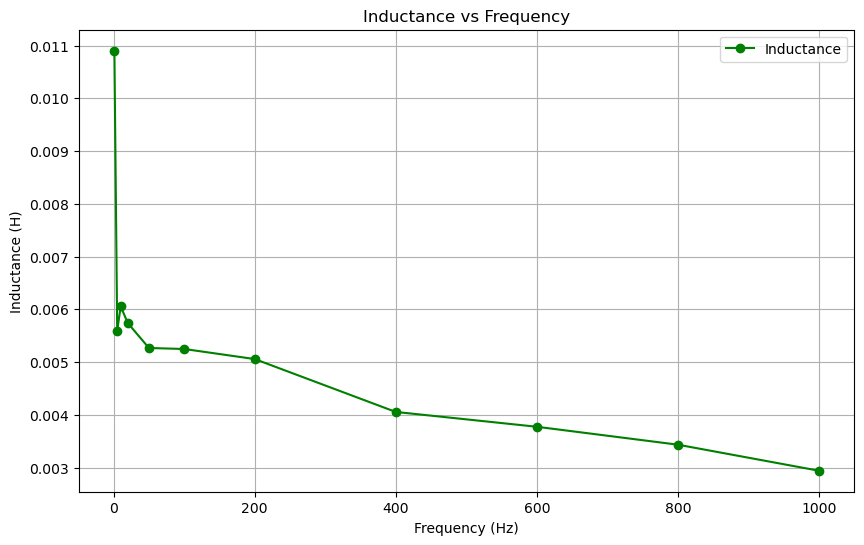

In [355]:
# Calculate inductance for each impedance result
frequencies = [imp.frequency for imp in impedance_results]
inductances = [
    np.sqrt(imp.magnitude**2 - imp.real**2) / (2 * np.pi * imp.frequency)
    for imp in impedance_results
]

# Plot inductance with respect to frequency
plt.figure(figsize=(10, 6))
plt.plot(frequencies, inductances, label='Inductance', marker='o', color='green')

# Set up labels and title
plt.xlabel('Frequency (Hz)')
plt.ylabel('Inductance (H)')
plt.title('Inductance vs Frequency')
plt.grid(True)

# Add legend and show plot
plt.legend()
plt.show()


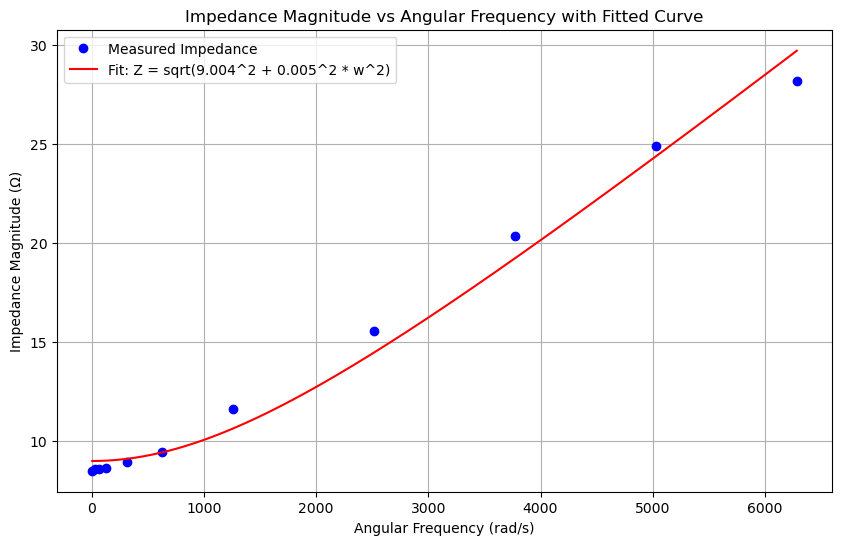

In [356]:
# Frequencies and corresponding impedance magnitudes
frequencies = np.array([imp.frequency for imp in impedance_results])
impedance_magnitudes = np.array([imp.magnitude for imp in impedance_results])

# Convert frequencies to angular frequency (omega)
angular_frequencies = 2 * np.pi * frequencies

# Define the model for the fit (Z = sqrt(R^2 + L^2 * w^2))
def impedance_model(w, R, L):
    return np.sqrt(R**2 + L**2 * w**2)

# Perform curve fitting
params, _ = curve_fit(impedance_model, angular_frequencies, impedance_magnitudes)
R, L = params

# Generate fit line
w_fit = np.linspace(min(angular_frequencies), max(angular_frequencies), 500)
z_fit = impedance_model(w_fit, R, L)

# Plot original data and fit
plt.figure(figsize=(10, 6))
plt.plot(angular_frequencies, impedance_magnitudes, 'o', label='Measured Impedance', color='blue')
plt.plot(w_fit, z_fit, '-', label=f'Fit: Z = sqrt({R:.3f}^2 + {L:.3f}^2 * w^2)', color='red')

# Set up labels and title
plt.xlabel('Angular Frequency (rad/s)')
plt.ylabel('Impedance Magnitude (Ω)')
plt.title('Impedance Magnitude vs Angular Frequency with Fitted Curve')
plt.legend()
plt.grid(True)
plt.show()


L = 5mH